In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
def load_dataset_from_github(api_directory_url):
    """
    Given a GitHub API URL pointing to a repository directory, fetches all CSV files
    in that directory and returns a dictionary mapping filenames to pandas DataFrames.

    Parameters:
    -----------
    api_directory_url : str
        GitHub API URL for a repository directory, e.g.
        "https://api.github.com/repos/username/repo/contents/path/to/dir"

    Returns:
    --------
    dict[str, pandas.DataFrame]
        A dictionary where each key is a CSV filename (e.g., "data.csv")
        and each value is the corresponding DataFrame obtained from reading
        the file's raw URL.
    array of dataframes
    """
    response = requests.get(api_directory_url)
    response.raise_for_status()  # Raise an error if request failed
    files = response.json()

    dataframes = {}
    for file in files:
        name = file.get("name", "")
        if name.endswith(".csv"):
            raw_url = file.get("download_url")
            if raw_url:
                dataframes[name] = pd.read_csv(raw_url)
    ordered_names = [
        '1-mental-illnesses-prevalence.csv',
        '2-burden-disease-from-each-mental-illness.csv',
        '3-adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv',
        '4-adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv',
        '5-anxiety-disorders-treatment-gap.csv',
        '6-depressive-symptoms-across-us-population.csv',
        '7-number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv'
    ]
    dfs = [dataframes[name] for name in ordered_names]
    return dataframes, dfs

In [3]:
# Load CSV files
file_path = "https://api.github.com/repos/AAI500TeamProject/thementalists-project/contents/Dataset/MentalHealth"
dataframes, dfs = load_dataset_from_github(file_path)

In [4]:
# Drop columns
for df in dfs:
     df.drop(columns ='Code', inplace=True)

#Rename the lengthy columns to make the table compact
for df in dfs:
     df.rename(columns = {
         'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia Disorders',
          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depression Disorders',
          'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety Disorders',
          'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar Disorders',
          'Eating disorders (share of population) - Sex: Both - Age: Age-standardized' : 'Eating Disorders'
}, inplace = True)

     df.rename(columns={
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders': 'Depression Disorders',
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia': 'Schizophrenia Disorders',
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder': 'Bipolar Disorder',
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders': 'Eating Disorders',
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders': 'Anxiety Disorders'
}, inplace=True)

     df.rename(columns={
          'Potentially adequate treatment, conditional': 'Adequate_Treatment',
          'Other treatments, conditional': 'Other_Treatments',
          'Untreated, conditional': 'Untreated'
}, inplace=True)

     df.rename(columns={
          'Nearly every day': 'Severe_Symptoms',
          'More than half the days': 'Moderate_Symptoms',
          'Several days': 'Mild_Symptoms',
          'Not at all': 'No_Symptoms'
}, inplace=True)


     df.rename(columns={
          'Number of countries with primary data on prevalence of mental disorders': 'Countries_With_Data'
}, inplace=True)

# standardizing column names
for df in dfs:
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Trim whitespace in string columns
for df in dfs:
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].str.strip()

# Convert data types where appropriate
for df in dfs:
    if 'year' in df.columns:
        df['year'] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

# Check for and handle missing values
for i, df in enumerate(dfs):
    print(f"\nMissing values in DataFrame {i}:")
    print(df.isnull().sum())

# Preview each DataFrame
for i, df in enumerate(dfs):
    print(f"\nDataFrame {i} Preview:")
    print(df.head())


Missing values in DataFrame 0:
entity                     0
year                       0
schizophrenia_disorders    0
depression_disorders       0
anxiety_disorders          0
bipolar_disorders          0
eating_disorders           0
dtype: int64

Missing values in DataFrame 1:
entity                     0
year                       0
depression_disorders       0
schizophrenia_disorders    0
bipolar_disorder           0
eating_disorders           0
anxiety_disorders          0
dtype: int64

Missing values in DataFrame 2:
entity              0
year                0
major_depression    0
dtype: int64

Missing values in DataFrame 3:
entity               0
year                 0
major_depression     0
bipolar_disorder     0
eating_disorders     0
dysthymia            0
schizophrenia        0
anxiety_disorders    0
dtype: int64

Missing values in DataFrame 4:
entity                0
year                  0
adequate_treatment    0
other_treatments      0
untreated             0
dtype: int64

In [5]:
for i, df in enumerate(dfs, start=5):
    print(f"{'='*60}")
    print(f"📊 DataFrame {i} Summary")
    print(f"{'='*60}")

    # Show basic info
    print(f"Shape: {df.shape}")
    print(f"\nColumns:\n{list(df.columns)}")

    # Show missing values neatly
    print(f"\nMissing Values:\n{df.isnull().sum()[df.isnull().sum() > 0].to_string()}")

    # Show preview
    print("\nPreview (first 5 rows):")
    display(df.head())  # Jupyter-friendly display

📊 DataFrame 5 Summary
Shape: (6420, 7)

Columns:
['entity', 'year', 'schizophrenia_disorders', 'depression_disorders', 'anxiety_disorders', 'bipolar_disorders', 'eating_disorders']

Missing Values:
Series([], )

Preview (first 5 rows):


entity  year  schizophrenia_disorders  depression_disorders  \
0  Afghanistan  1990                 0.223206              4.996118   
1  Afghanistan  1991                 0.222454              4.989290   
2  Afghanistan  1992                 0.221751              4.981346   
3  Afghanistan  1993                 0.220987              4.976958   
4  Afghanistan  1994                 0.220183              4.977782   

   anxiety_disorders  bipolar_disorders  eating_disorders  
0           4.713314           0.703023          0.127700  
1           4.702100           0.702069          0.123256  
2           4.683743           0.700792          0.118844  
3           4.673549           0.700087          0.115089  
4           4.670810           0.699898          0.111815

📊 DataFrame 6 Summary
Shape: (6840, 7)

Columns:
['entity', 'year', 'depression_disorders', 'schizophrenia_disorders', 'bipolar_disorder', 'eating_disorders', 'anxiety_disorders']

Missing Values:
Series([], )

Preview (first 5 rows):


entity  year  depression_disorders  schizophrenia_disorders  \
0  Afghanistan  1990             895.22565                138.24825   
1  Afghanistan  1991             893.88434                137.76122   
2  Afghanistan  1992             892.34973                137.08030   
3  Afghanistan  1993             891.51587                136.48602   
4  Afghanistan  1994             891.39160                136.18323   

   bipolar_disorder  eating_disorders  anxiety_disorders  
0         147.64412         26.471115          440.33000  
1         147.56696         25.548681          439.47202  
2         147.13086         24.637949          437.60718  
3         146.78812         23.863169          436.69104  
4         146.58481         23.189074          436.76800

📊 DataFrame 7 Summary
Shape: (22, 3)

Columns:
['entity', 'year', 'major_depression']

Missing Values:
Series([], )

Preview (first 5 rows):


entity  year  major_depression
0  Andean Latin America  2008               0.0
1          Asia Pacific  2008              80.8
2           Australasia  2008             100.0
3             Caribbean  2008               9.1
4          Central Asia  2008               0.0

📊 DataFrame 8 Summary
Shape: (22, 8)

Columns:
['entity', 'year', 'major_depression', 'bipolar_disorder', 'eating_disorders', 'dysthymia', 'schizophrenia', 'anxiety_disorders']

Missing Values:
Series([], )

Preview (first 5 rows):


entity  year  major_depression  bipolar_disorder  \
0  Andean Latin America  2008               0.0               0.0   
1          Asia Pacific  2008              80.8               3.8   
2           Australasia  2008             100.0             100.0   
3             Caribbean  2008               9.1               0.0   
4          Central Asia  2008               0.0               0.0   

   eating_disorders  dysthymia schizophrenia  anxiety_disorders  
0               0.0        0.0             0                0.0  
1              23.1        1.0          71.6               93.1  
2              16.4      100.0          85.1              100.0  
3               0.0        0.0          28.3                0.0  
4               0.0        0.0             0                0.0

📊 DataFrame 9 Summary
Shape: (26, 5)

Columns:
['entity', 'year', 'adequate_treatment', 'other_treatments', 'untreated']

Missing Values:
Series([], )

Preview (first 5 rows):


entity  year  adequate_treatment  other_treatments  \
0                Argentina  2015                12.0              18.0   
1  Beijing/Shanghai, China  2005                 8.8               8.5   
2                  Belgium  2002                11.2              24.5   
3                 Bulgaria  2006                 7.3              14.3   
4                 Colombia  2012                 3.2              10.0   

   untreated  
0       70.0  
1       82.7  
2       64.3  
3       78.4  
4       86.8

📊 DataFrame 10 Summary
Shape: (10, 6)

Columns:
['entity', 'year', 'severe_symptoms', 'moderate_symptoms', 'mild_symptoms', 'no_symptoms']

Missing Values:
Series([], )

Preview (first 5 rows):


entity  year  severe_symptoms  moderate_symptoms  \
0           Appetite change  2014              4.6                5.1   
1   Average across symptoms  2014              4.4                4.3   
2            Depressed mood  2014              3.6                3.9   
3  Difficulty concentrating  2014              3.5                3.6   
4          Loss of interest  2014              4.4                5.4   

   mild_symptoms  no_symptoms  
0           15.5         74.8  
1           15.0         76.3  
2           16.8         75.7  
3           10.9         82.1  
4           16.3         73.8

📊 DataFrame 11 Summary
Shape: (15, 3)

Columns:
['entity', 'year', 'countries_with_data']

Missing Values:
Series([], )

Preview (first 5 rows):


entity  year  countries_with_data
0                     Alcohol use disorders  2019                   58
1                 Amphetamine use disorders  2019                   58
2                          Anorexia nervosa  2019                   27
3                         Anxiety disorders  2019                   58
4  Attention-deficit hyperactivity disorder  2019                  172

Table: 1-mental-illnesses-prevalence.csv 

Boxplot and KDE for Column Name: schizophrenia_disorders


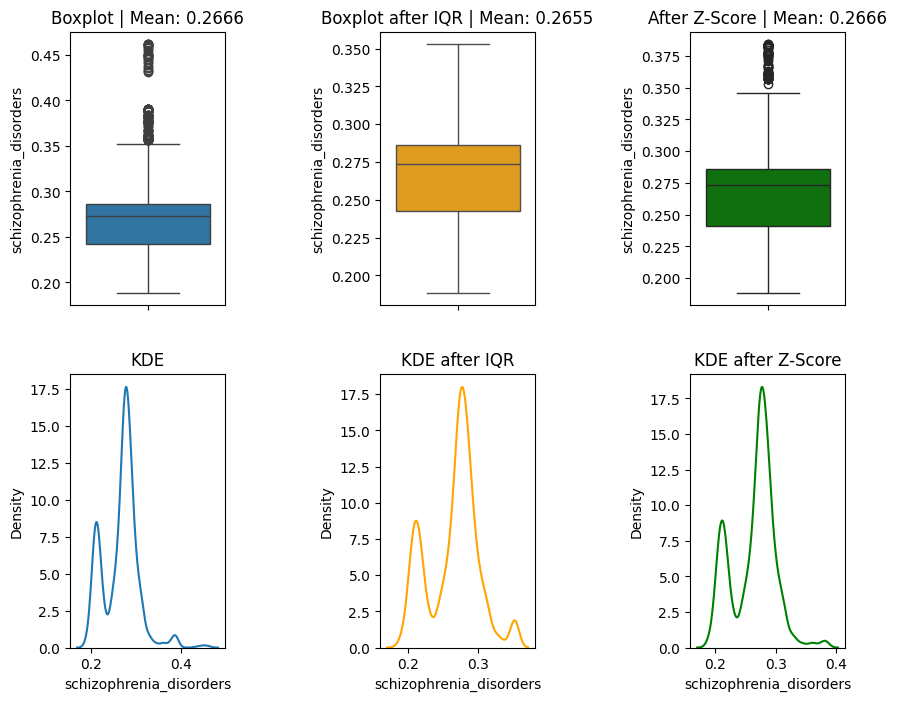

Boxplot and KDE for Column Name: depression_disorders


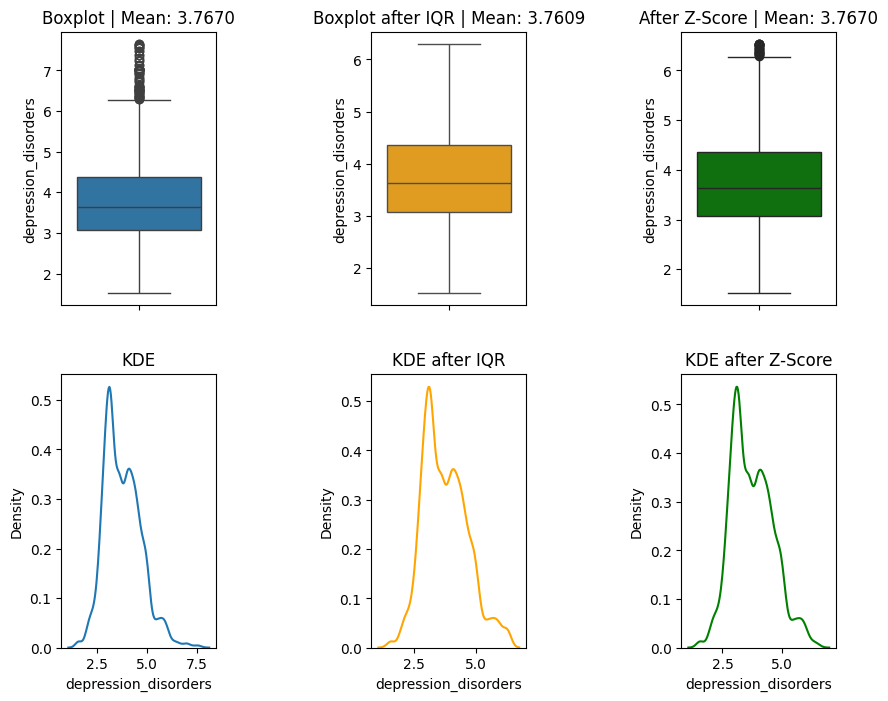

Boxplot and KDE for Column Name: anxiety_disorders


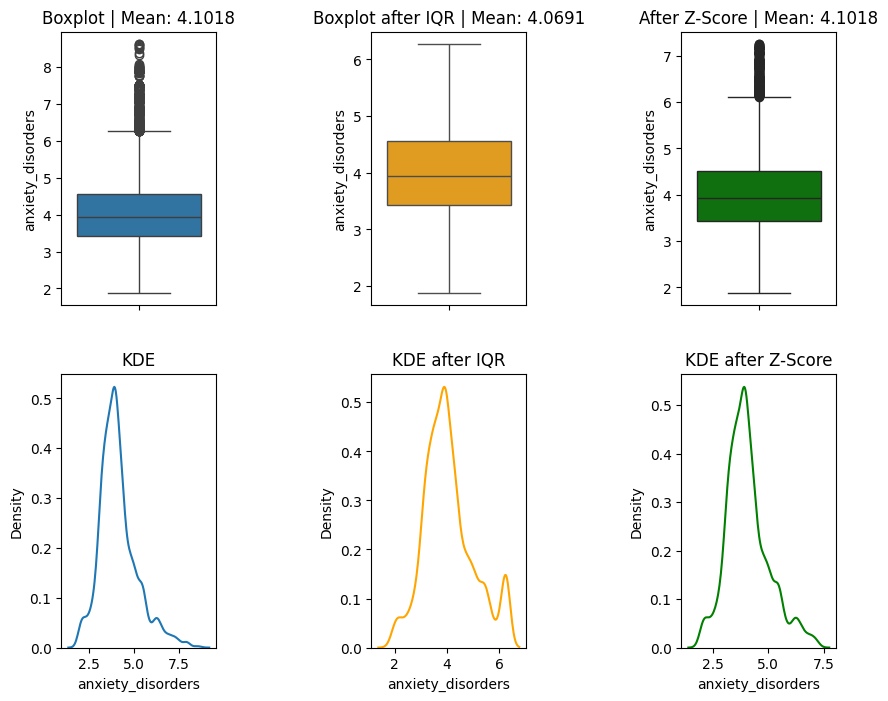

Boxplot and KDE for Column Name: bipolar_disorders


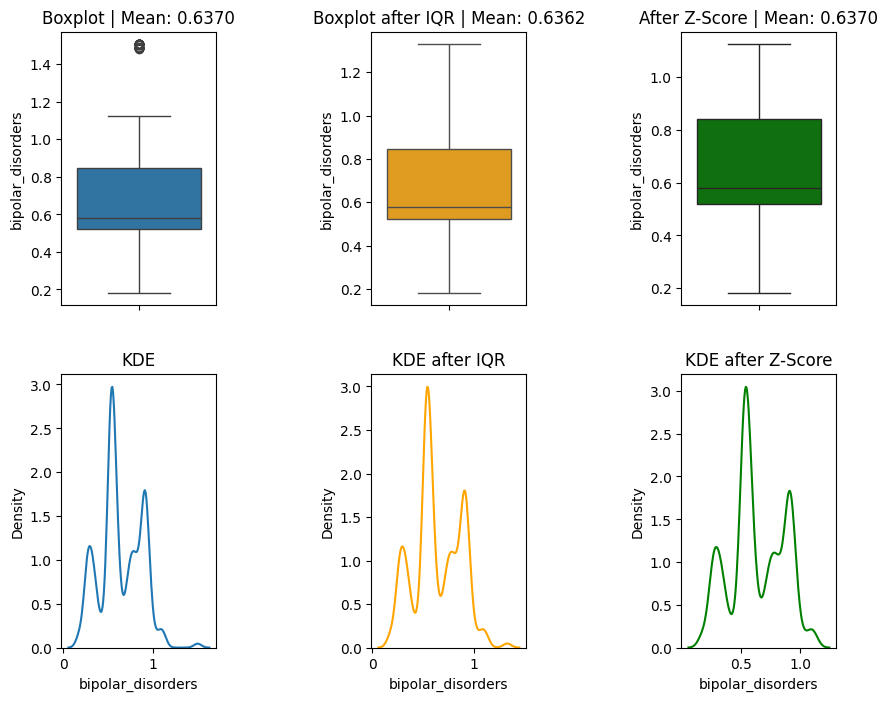

Boxplot and KDE for Column Name: eating_disorders


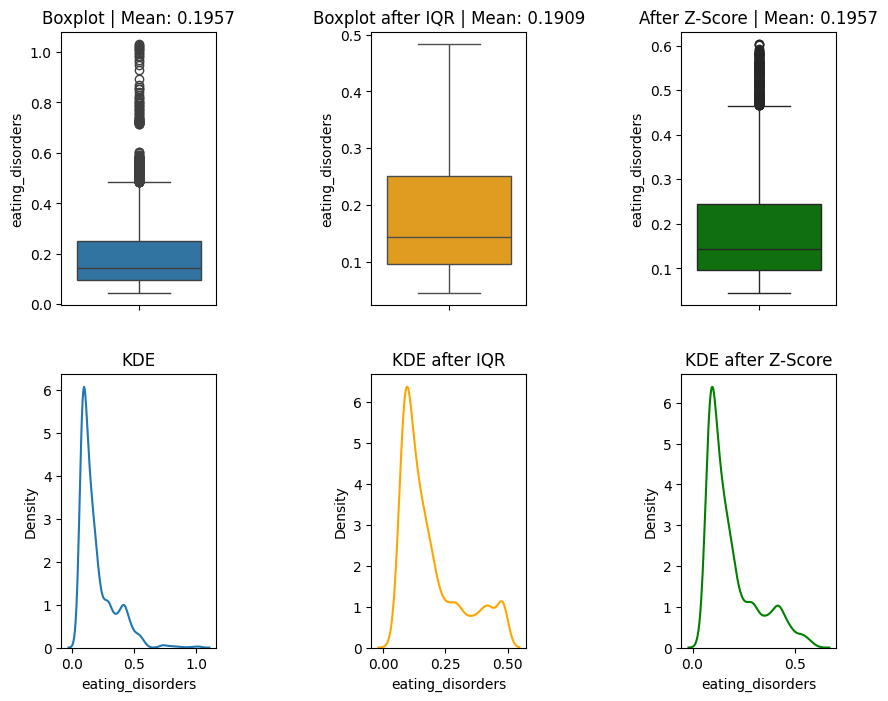

Table: 2-burden-disease-from-each-mental-illness.csv 

Boxplot and KDE for Column Name: depression_disorders


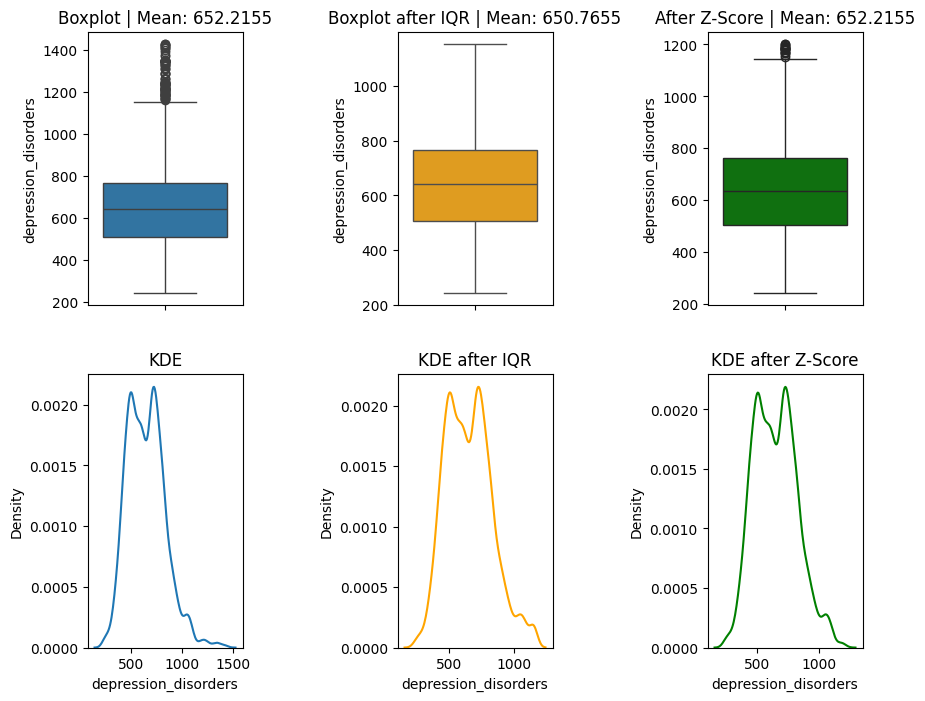

Boxplot and KDE for Column Name: schizophrenia_disorders


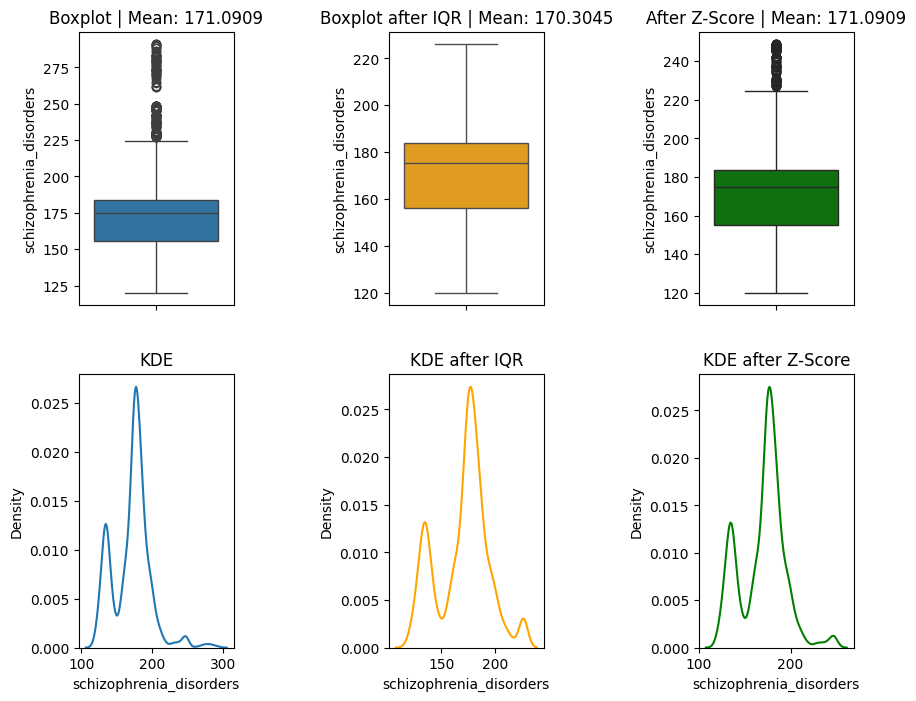

Boxplot and KDE for Column Name: bipolar_disorder


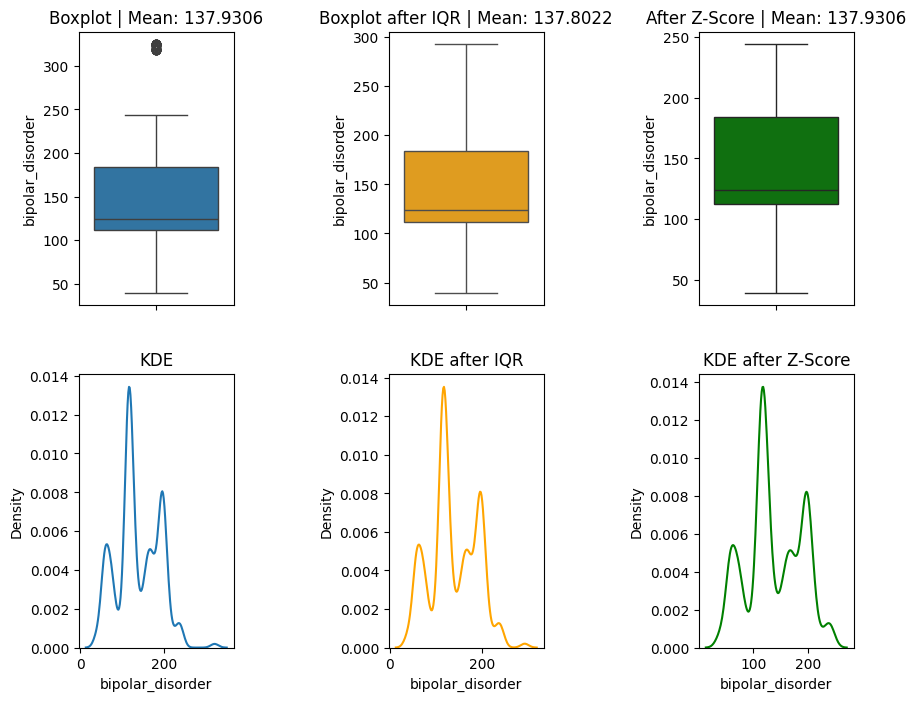

Boxplot and KDE for Column Name: eating_disorders


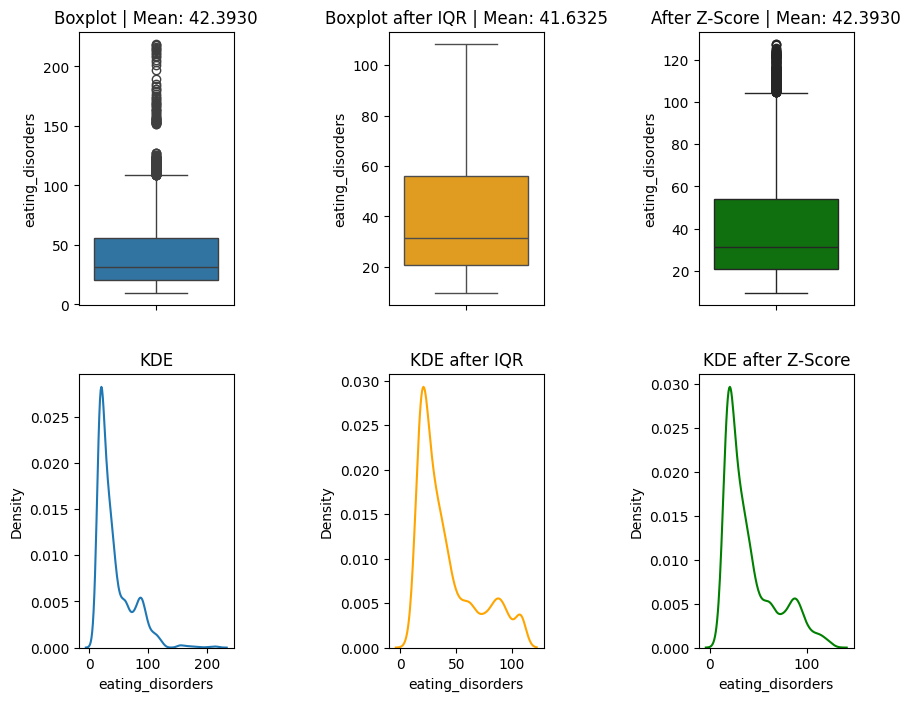

Boxplot and KDE for Column Name: anxiety_disorders


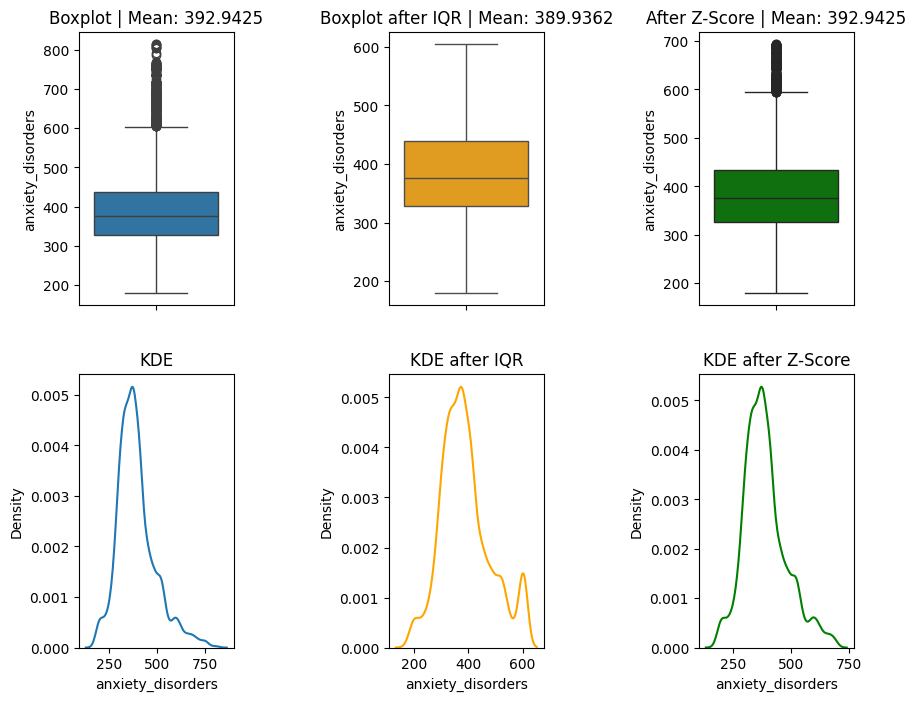

Table: 3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv 

Boxplot and KDE for Column Name: Year


<ipython-input-6-4127096385>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_skip[column], ax=axes[1][0])
<ipython-input-6-4127096385>:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_iqr[column], ax=axes[1][1], color='orange')
<ipython-input-6-4127096385>:33: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  df_z['z_score'] = zscore(df_z[column])


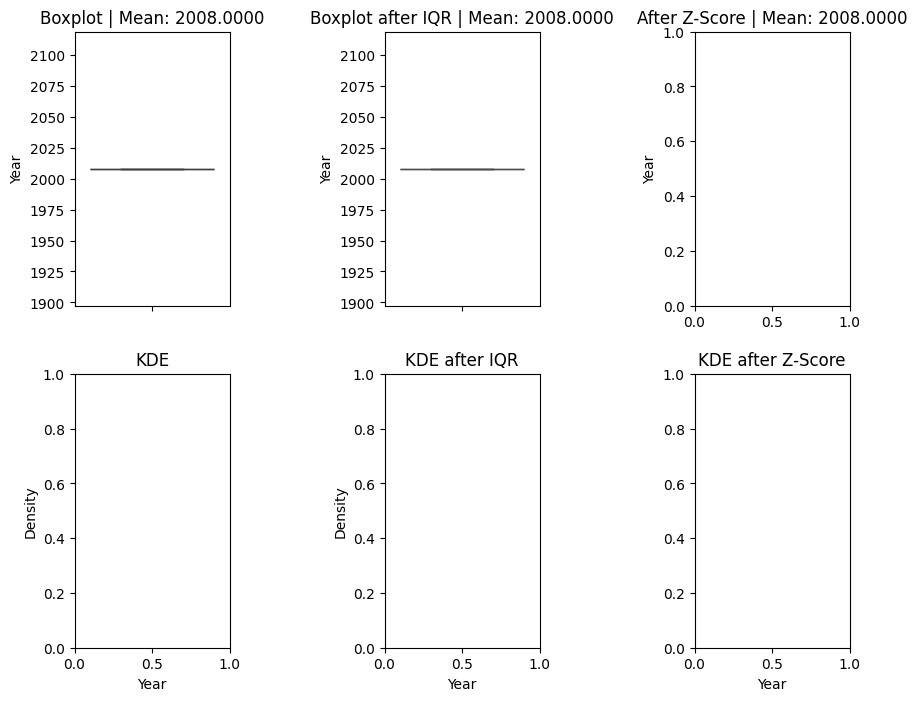

Boxplot and KDE for Column Name: Major depression


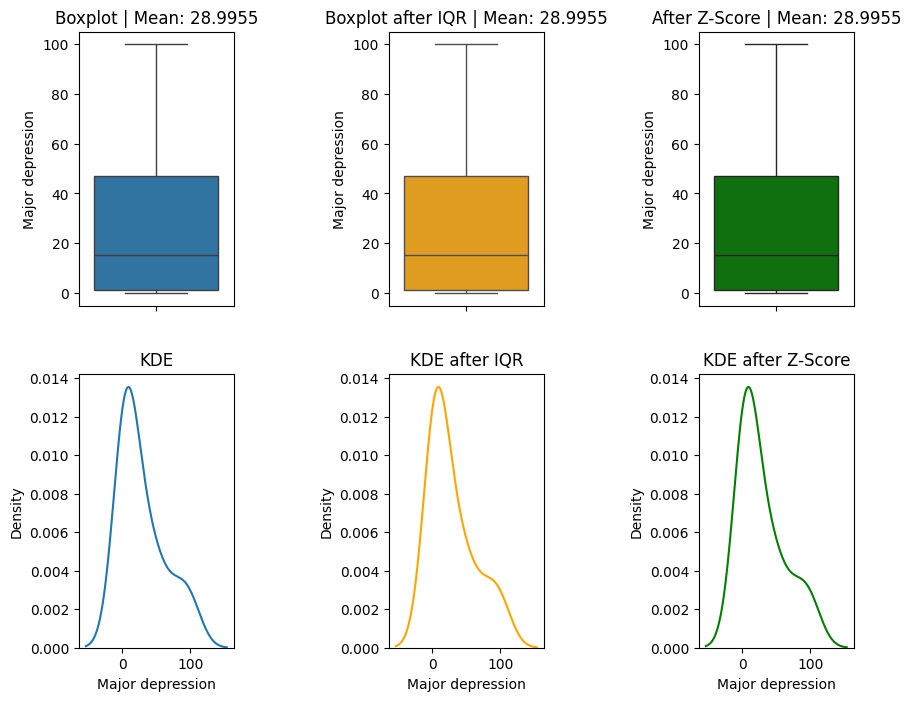

Table: 3-adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv 

Boxplot and KDE for Column Name: major_depression


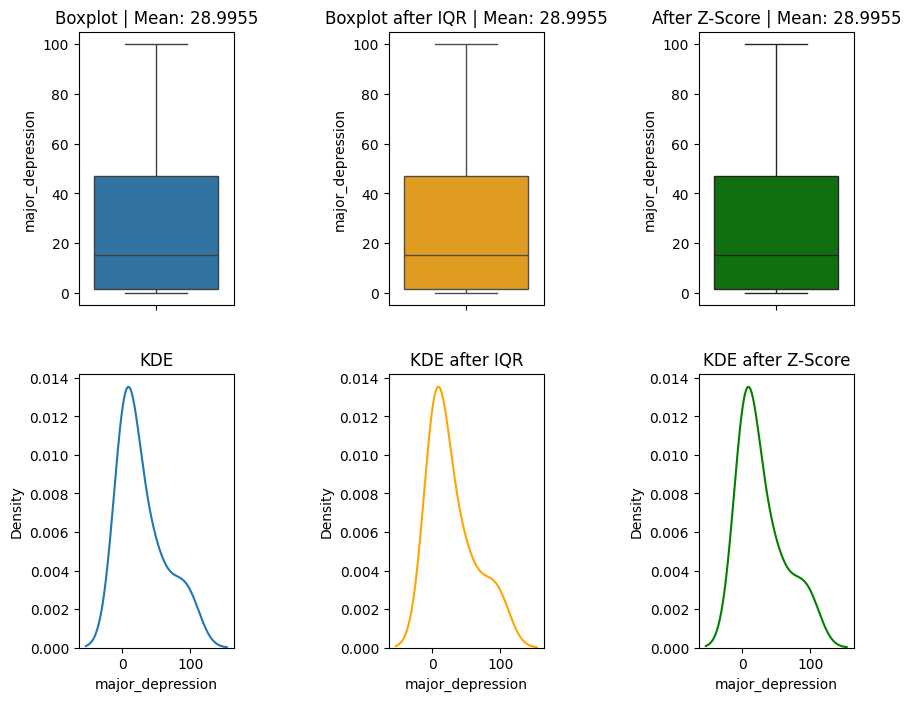

Table: 4-adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv 

Boxplot and KDE for Column Name: major_depression


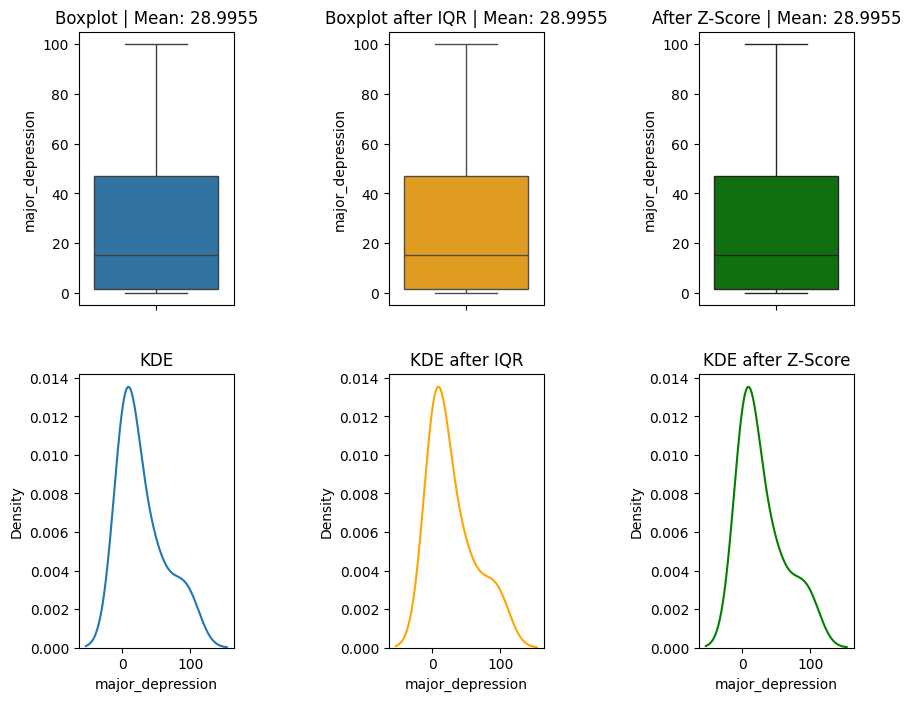

Boxplot and KDE for Column Name: bipolar_disorder


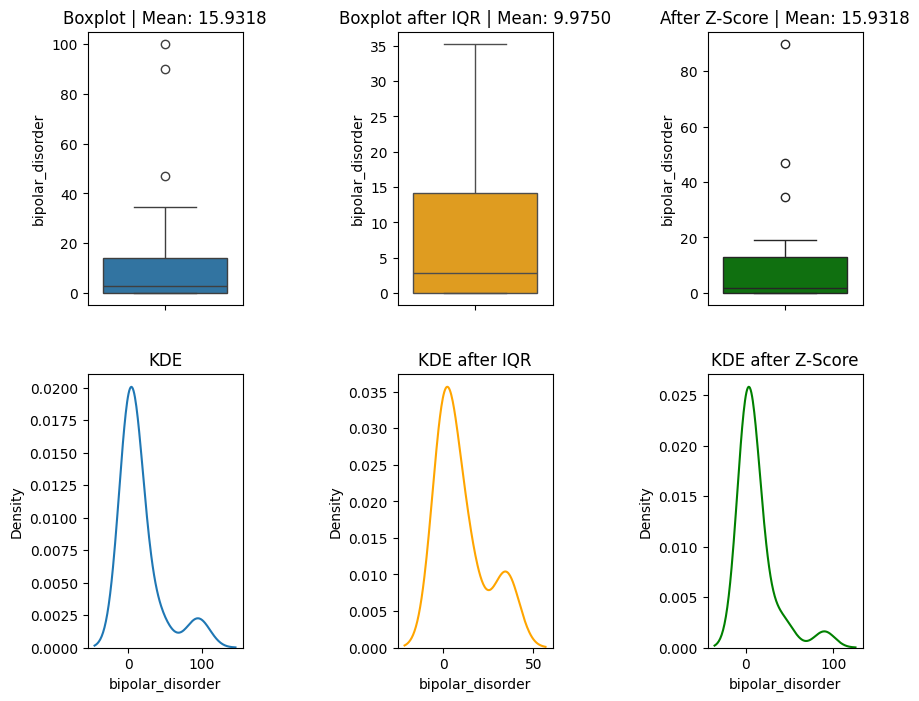

Boxplot and KDE for Column Name: eating_disorders


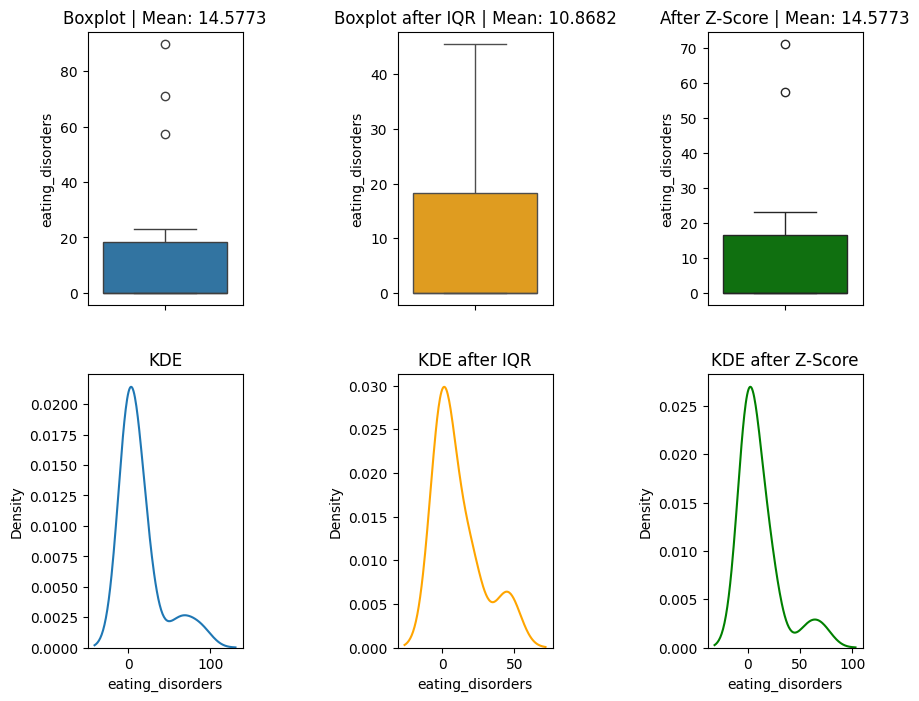

Boxplot and KDE for Column Name: dysthymia


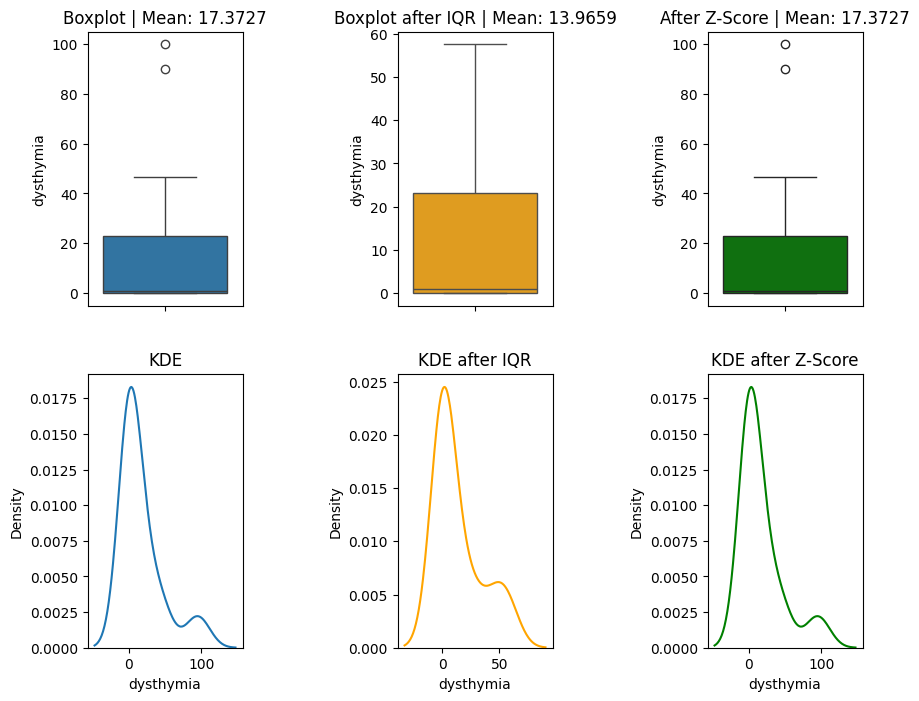

Boxplot and KDE for Column Name: schizophrenia


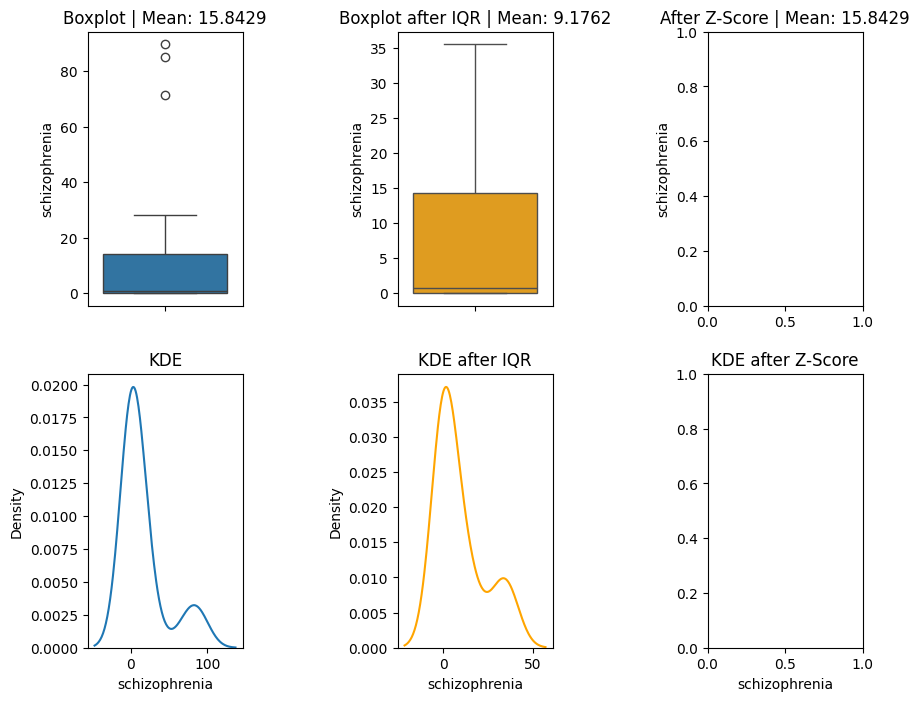

Boxplot and KDE for Column Name: anxiety_disorders


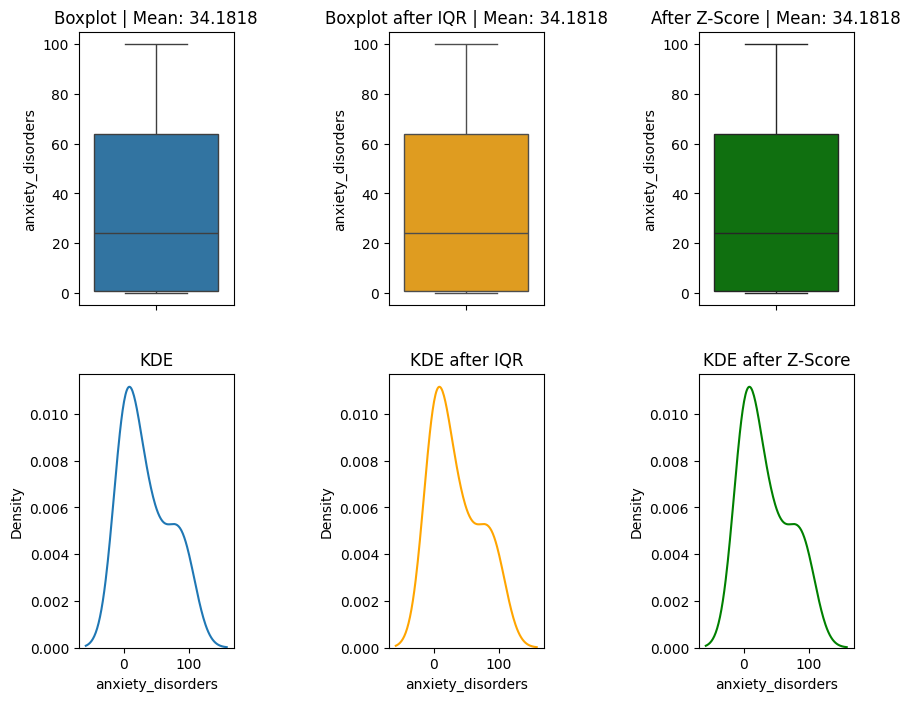

Table: 5-anxiety-disorders-treatment-gap.csv 

Boxplot and KDE for Column Name: adequate_treatment


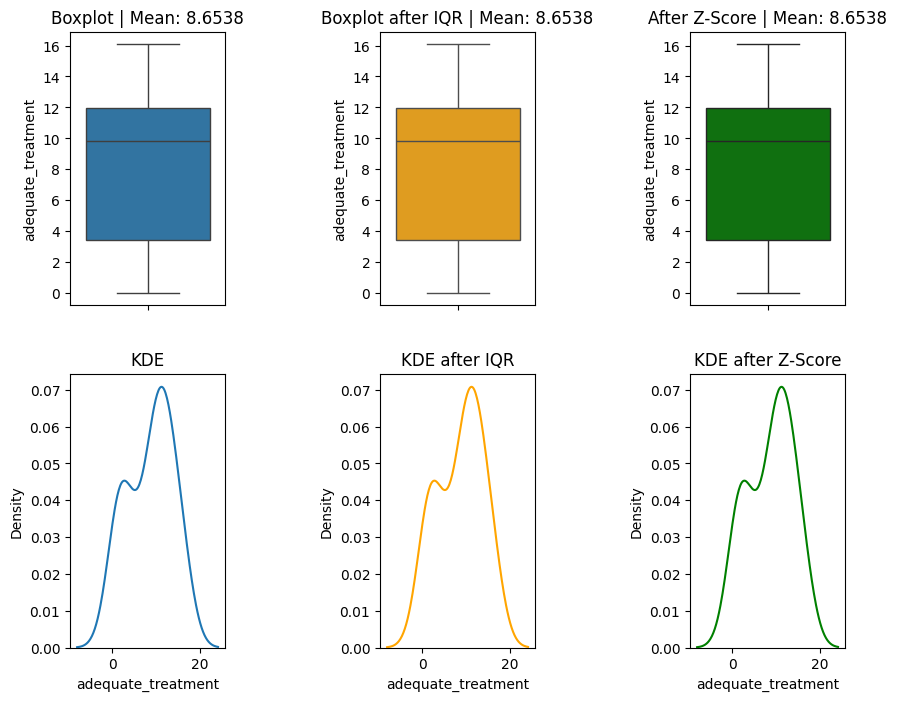

Boxplot and KDE for Column Name: other_treatments


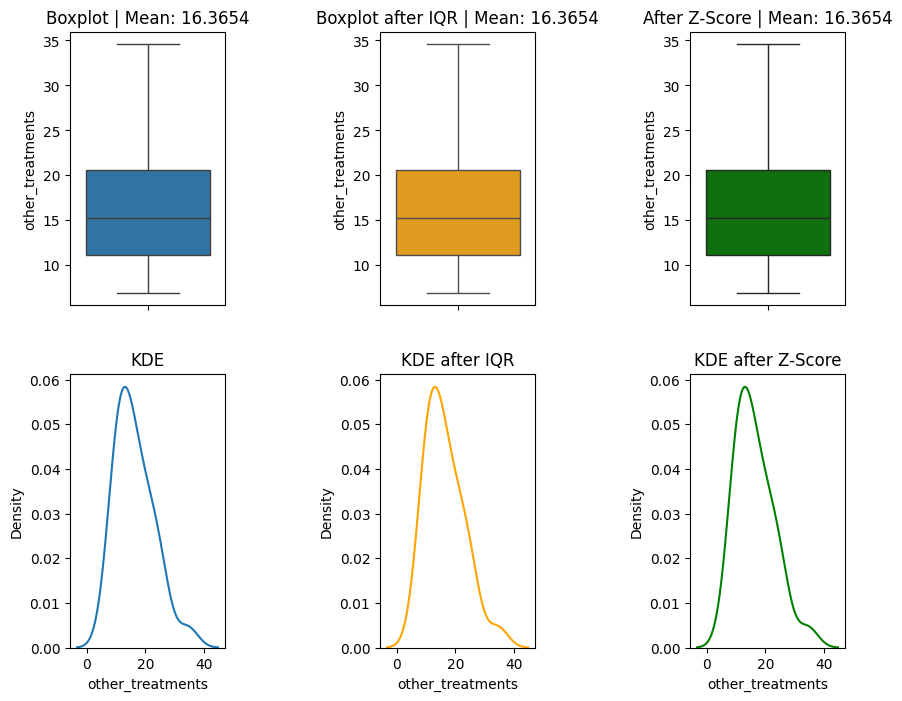

Boxplot and KDE for Column Name: untreated


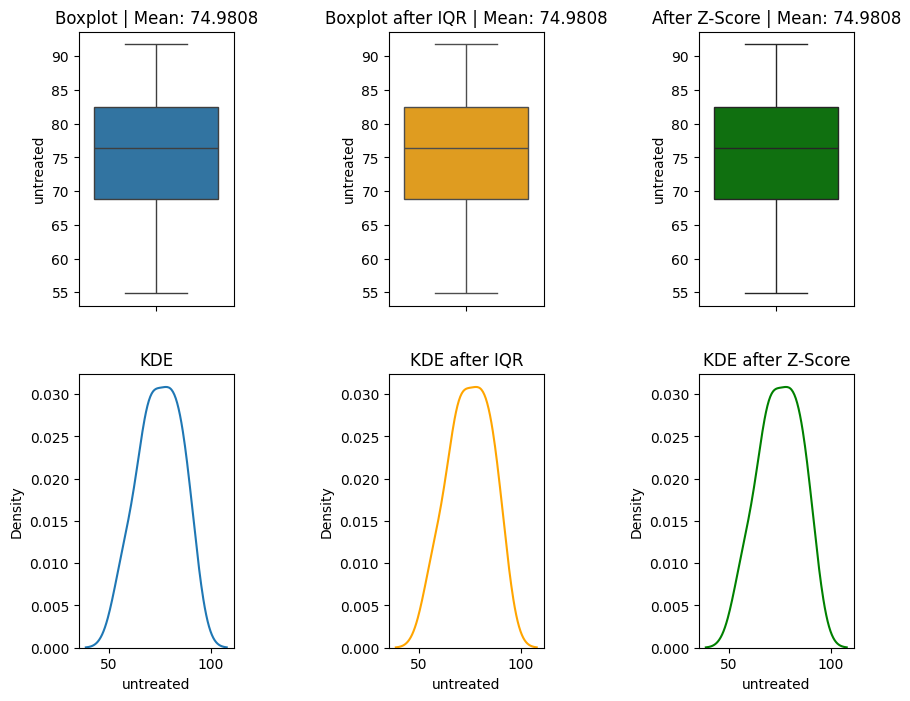

Table: 6-depressive-symptoms-across-us-population.csv 

Boxplot and KDE for Column Name: severe_symptoms


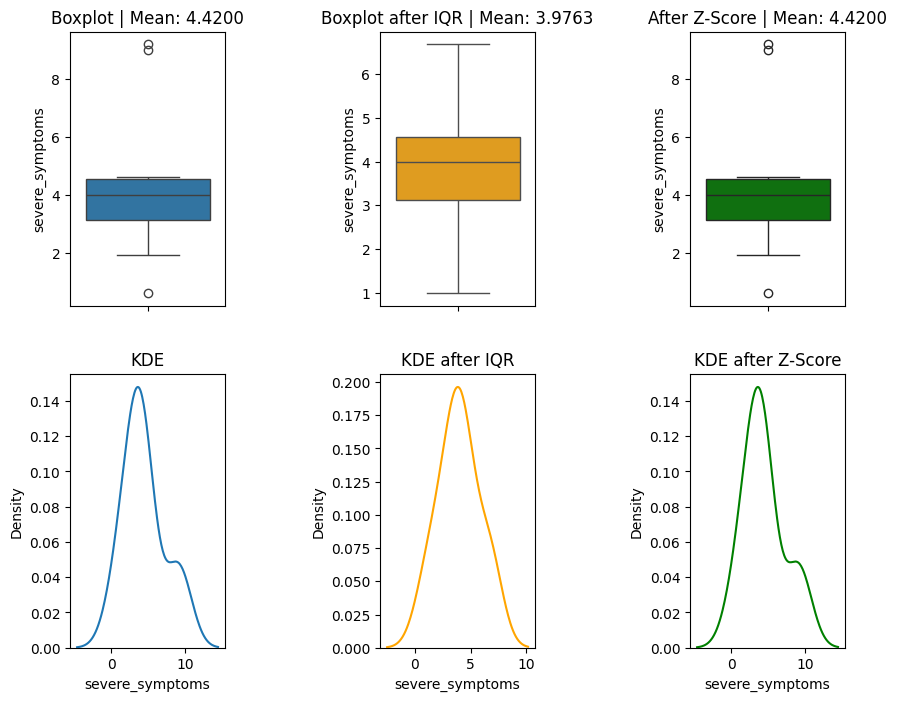

Boxplot and KDE for Column Name: moderate_symptoms


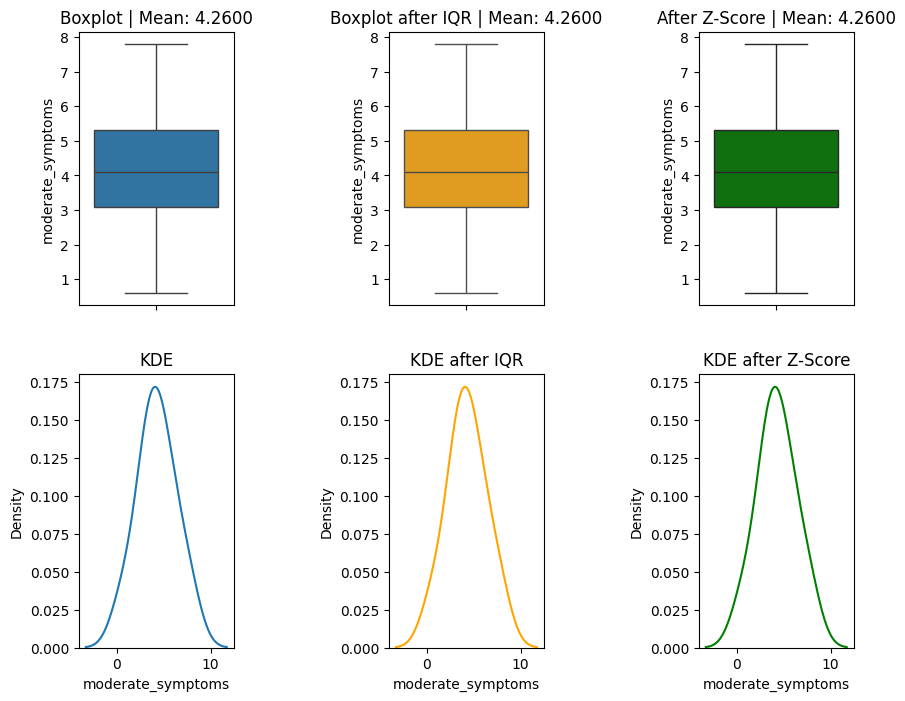

Boxplot and KDE for Column Name: mild_symptoms


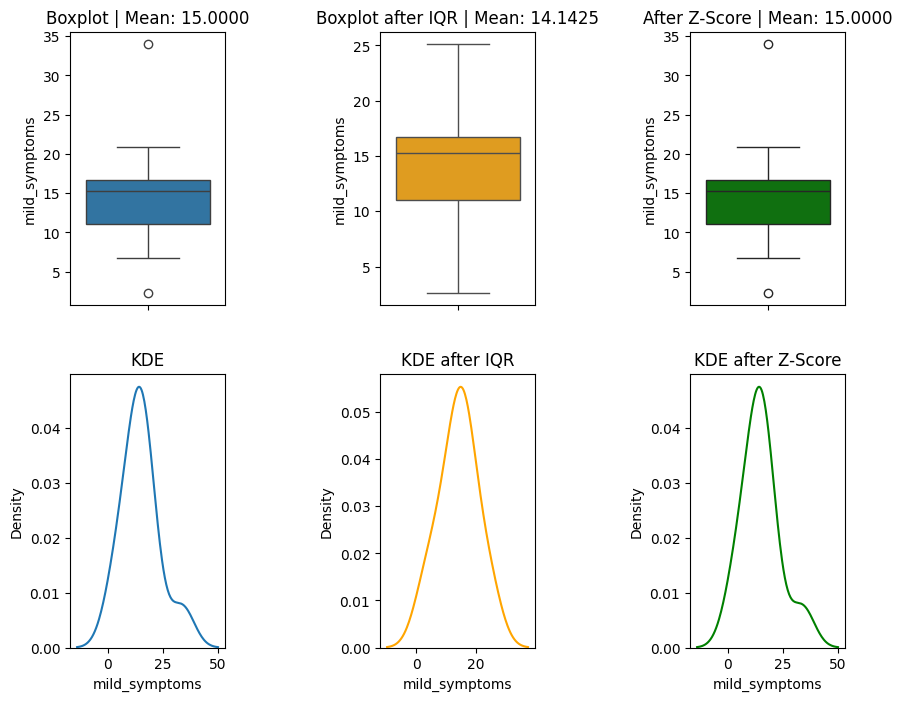

Boxplot and KDE for Column Name: no_symptoms


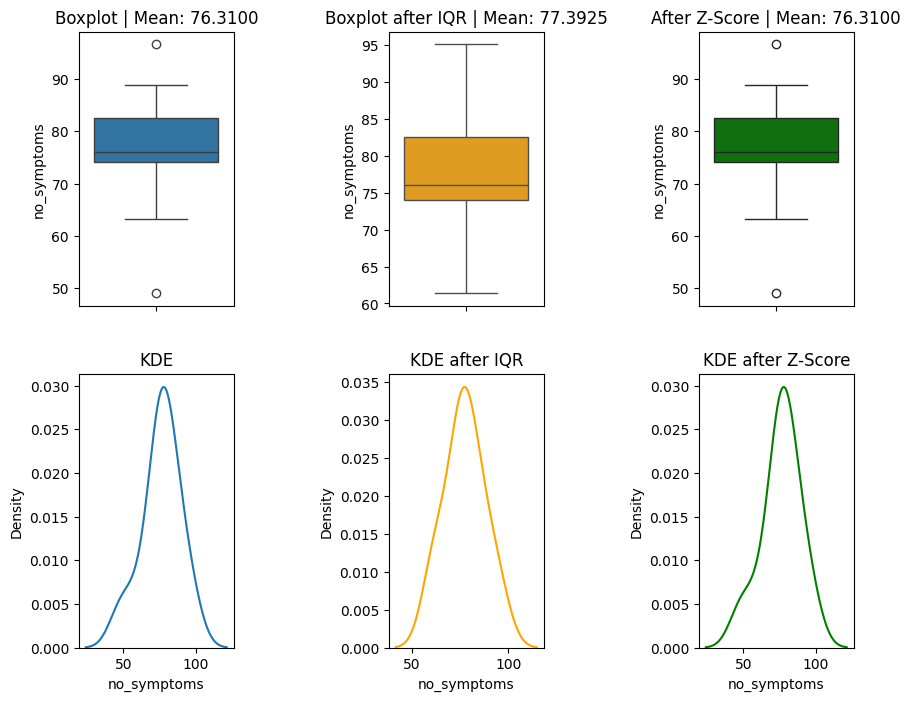

Table: 7-number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv 

Boxplot and KDE for Column Name: countries_with_data


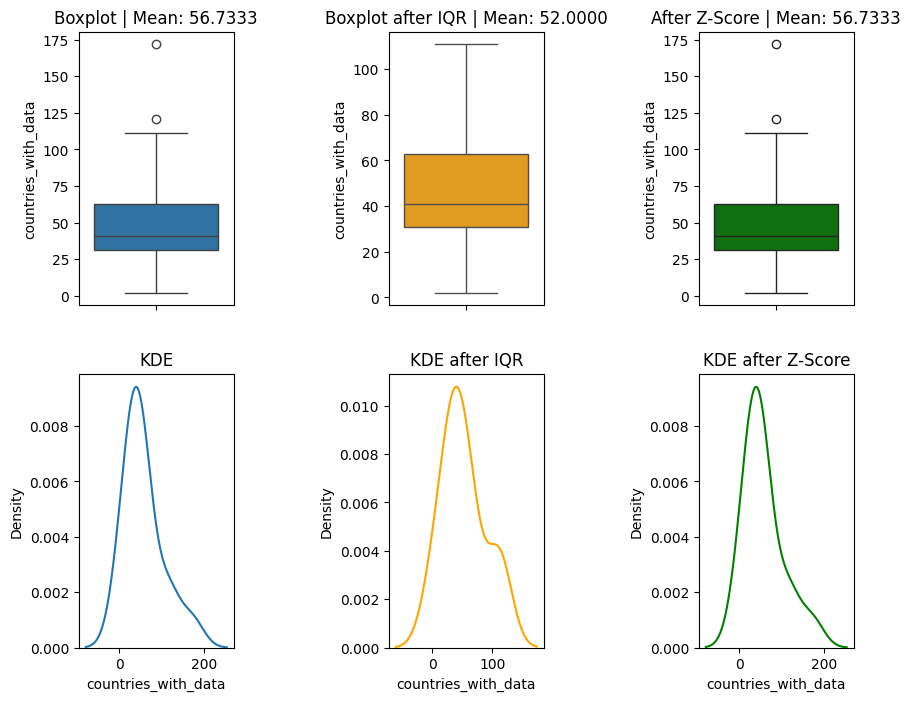

In [6]:
for name in dataframes:
    print(f"Table: {name} \n")
    df_skip = dataframes[name].iloc[:, 2:]
    df_skip = df_skip.apply(pd.to_numeric, errors='coerce') #while developing, detect some values are string type, so using this to safely convert them into numeric

    for column in df_skip:
        print(f"Boxplot and KDE for Column Name: {column}")
        #draw boxplot and kde before analyte to visualize the outliers
        fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 8))
        plt.subplots_adjust(wspace=1, hspace=0.25)
        axes[0][0].set_title(f'Boxplot | Mean: {df_skip[column].mean():.4f}')
        sns.boxplot(y=df_skip[column], ax=axes[0][0])
        axes[1][0].set_title(f'KDE')
        sns.kdeplot(df_skip[column], ax=axes[1][0])

        #handle outliers using IQR
        Q1 = df_skip[column].quantile(0.25)
        Q3 = df_skip[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_iqr = df_skip[[column]].copy()
        df_iqr[column]= df_skip[column].clip(lower=lower_bound, upper=upper_bound)

        #draw boxplot after handling outliers
        axes[0][1].set_title(f'Boxplot after IQR | Mean: {df_iqr[column].mean():.4f}')
        sns.boxplot(y=df_iqr[column], ax=axes[0][1], color='orange')
        axes[1][1].set_title(f'KDE after IQR')
        sns.kdeplot(df_iqr[column], ax=axes[1][1], color='orange')

        # Try z-score method to compare results with IQR method
        df_z = df_skip[[column]].copy()
        df_z['z_score'] = zscore(df_z[column])
        df_z['capped'] = df_z[column].where(df_z['z_score'].abs() <= 3) #created capped column to cap values smaller or equal to z-score 3 which is 99.7%

        axes[0][2].set_title(f'After Z-Score | Mean: {df_z[column].mean():.4f}')
        sns.boxplot(y=df_z['capped'].dropna(), ax=axes[0][2], color='green')
        axes[0][2].set_ylabel(f'{column}')
        axes[1][2].set_title(f'KDE after Z-Score')
        sns.kdeplot(df_z['capped'].dropna(), ax=axes[1][2], color='green')
        axes[1][2].set_xlabel(f'{column}')

        plt.show()


We decided not to remove outliers from the dataset for the following reasons:

In most cases, the outliers did not significantly affect the mean, indicating a relatively stable central tendency.

While some variables showed a noticeable shift in the mean, the outliers still represent valid, real-world observations rather than data entry errors.

These rare but extreme values could carry important information, especially in the context of mental health prevalence, and may be valuable for model learning, anomaly detection, or identifying high-risk populations.

Removing them could lead to a loss of meaningful patterns and potentially limit the model’s generalizability to edge cases.

Therefore, we chose to retain the outliers to preserve the full data distribution and ensure the model captures both common and exceptional conditions.

# Correlation and Covariance Heat Map
##### Will not be applied to datasets 3, 6, and 7 because these datasets require comparing the categorical "Entity" column with numeric columns.

    High correlation and high covariance → strong linear relationship with similar variance scale. -> could be used for linear regression

    High correlation but very low covariance m ay indicate the variables vary similarly in pattern but not in magnitude.

    Very low covariance (close to zero) → almost no shared variance even if the correlation is moderate.

## mental-illnesses-prevalence                              

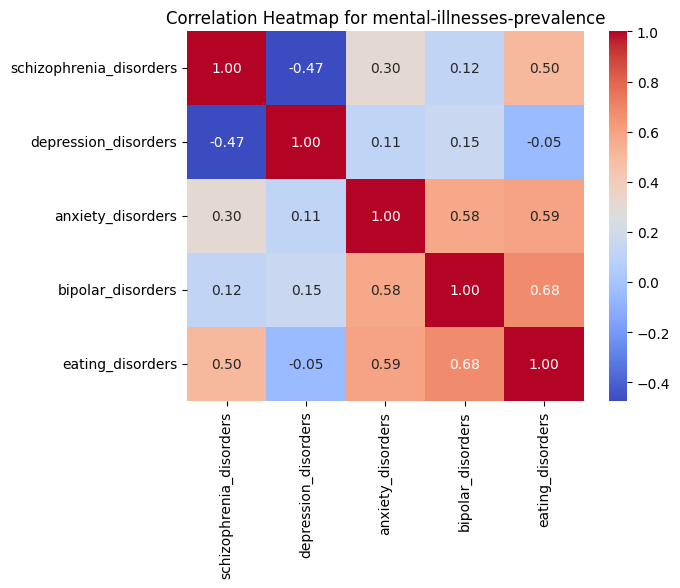

In [7]:
df_skip = dataframes['1-mental-illnesses-prevalence.csv'].iloc[:, 2:]
df_skip = df_skip.apply(pd.to_numeric, errors='coerce')
corr_matrix = df_skip.corr()

#draw heatmap for correlation matrix for tables that has more than 2 columns
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for mental-illnesses-prevalence')
plt.show()

| Column                      | Strongest Correlation With                        | Correlation Value | Independent?     |
| --------------------------- | ------------------------------------------------- | ----------------- | ---------------- |
| `schizophrenia_disorders`   | `eating_disorders`                       | **+0.50**         | ❌ No             |
| `depression_disorders`      | `schizophrenia_disorders`                         | **–0.47**         | ⚠️ Weak/moderate |
| `anxiety_disorders`         | `eating_disorders` / `bipolar_disorders` | **\~0.58–0.59**   | ❌ No             |
| `bipolar_disorders`         | `eating_disorders`                       | **+0.68**         | ❌ No             |
| `eating_disorders` | `bipolar_disorders`                               | **+0.68**         | ❌ No             |


depression_disorders has weaker correlations with the rest (e.g., only –0.47 with schizophrenia and near-zero with others), so it's the most independent in this set.

All others are moderately correlated, especially with eating disorders and bipolar disorders.


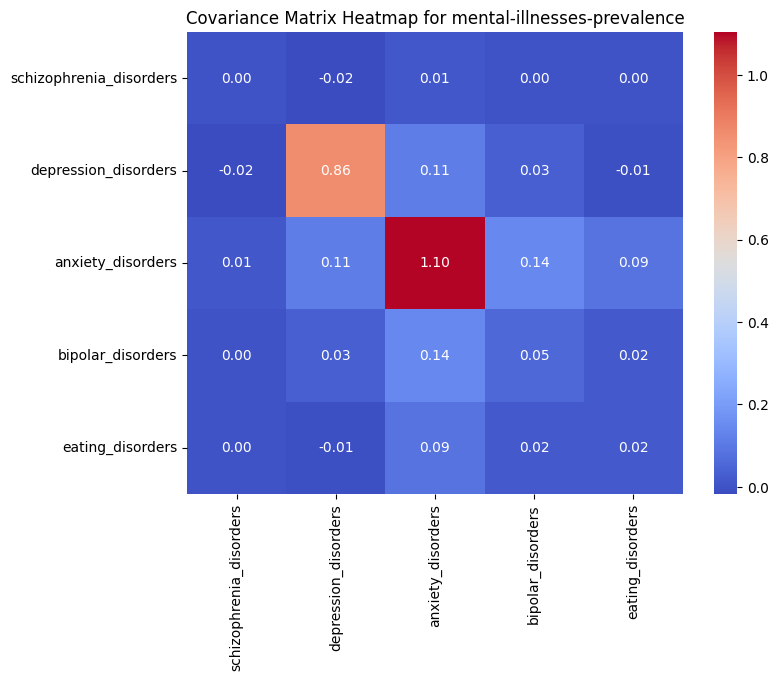

                Variable 1         Variable 2  Correlation  Covariance
0  schizophrenia_disorders   eating_disorders     0.500656    0.002728
1        anxiety_disorders  bipolar_disorders     0.576230    0.141284
2        anxiety_disorders   eating_disorders     0.594511    0.086427
3        bipolar_disorders   eating_disorders     0.677927    0.021895


In [8]:
cov_matrix = df_skip.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Covariance Matrix Heatmap for mental-illnesses-prevalence")
plt.show()

strong_corr_pairs = []

# Find pairs of variables with strong correlation (|corr| >= 0.5) and their covariance
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) >= 0.5:
            cov_val = cov_matrix.loc[col1, col2]
            strong_corr_pairs.append((col1, col2, corr_val, cov_val))
result_df = pd.DataFrame(strong_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation', 'Covariance'])
print(result_df)

| Variable Pair                                    | Correlation | Covariance | Interpretation                                                                              |
| ------------------------------------------------ | ----------- | ---------- | ------------------------------------------------------------------------------------------- |
| **bipolar\_disorders & eating\_disorders**       | **0.678**   | **0.0219** | Strong correlation; moderate covariance — they move together well and on a similar scale.   |
| **anxiety\_disorders & eating\_disorders**       | **0.595**   | **0.0864** | Also strongly related, and the high covariance shows they vary together with similar units. |
| **anxiety\_disorders & bipolar\_disorders**      | **0.576**   | **0.1413** | Strongest covariance in this list → similar unit spread and mutual variation.               |
| **schizophrenia\_disorders & eating\_disorders** | **0.501**   | **0.0027** | Moderate correlation, but **very small covariance** — may differ in scale significantly.    |



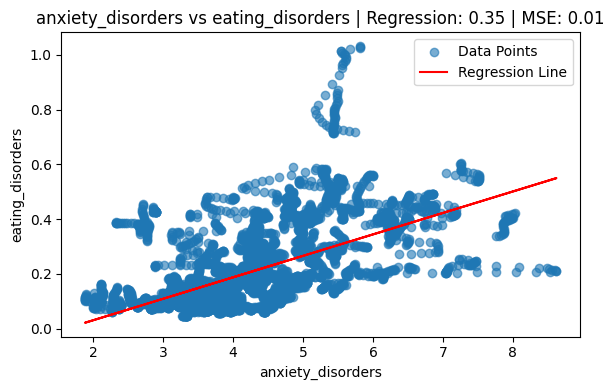

In [9]:
col_x = "anxiety_disorders"
col_y = "eating_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

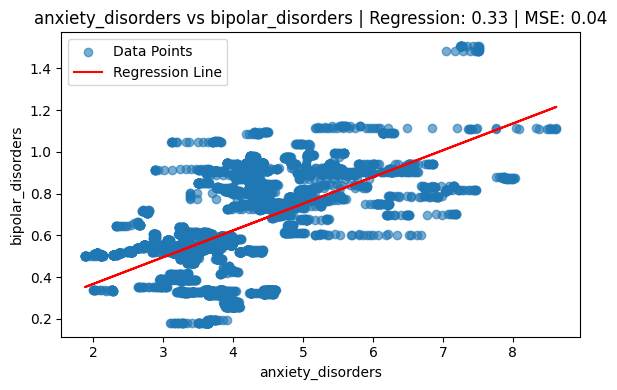

In [10]:
col_x = "anxiety_disorders"
col_y = "bipolar_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

## burden-disease-from-each-mental-illness

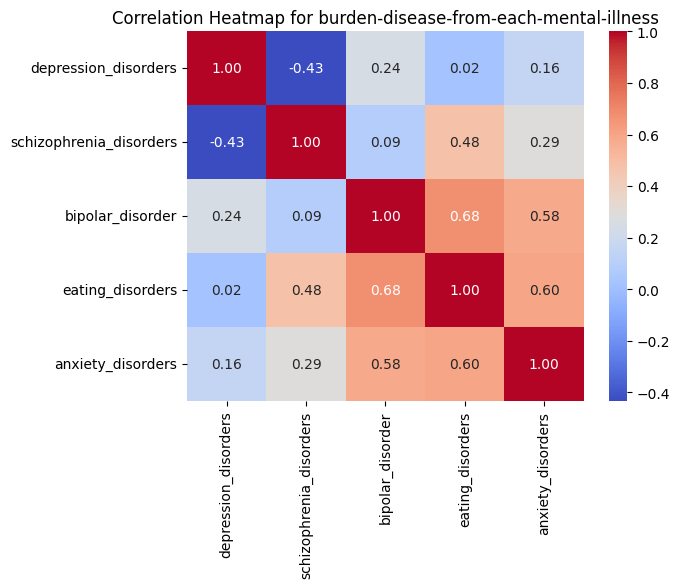

In [11]:
df_skip = dataframes['2-burden-disease-from-each-mental-illness.csv'].iloc[:, 2:]
df_skip = df_skip.apply(pd.to_numeric, errors='coerce')
corr_matrix = df_skip.corr()

#draw heatmap for correlation matrix for tables that has more than 2 columns
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for burden-disease-from-each-mental-illness')
plt.show()

| Column               | Highest Absolute Correlation | Likely Independent?      |
| -------------------- | ---------------------------- | ------------------------ |
| **Depression**       | –0.43                        | Yes (most independent) |
| **Schizophrenia**    | 0.48                         | Somewhat correlated   |
| **Bipolar, Anxiety** | >0.5 with others             | No (highly correlated) |
| **Eating Disorders** | 0.6+ with 2 others           | No                     |


Depression burden is most independent from the others (nearly uncorrelated or negatively correlated).

Eating disorders, bipolar, and anxiety burdens are highly interrelated

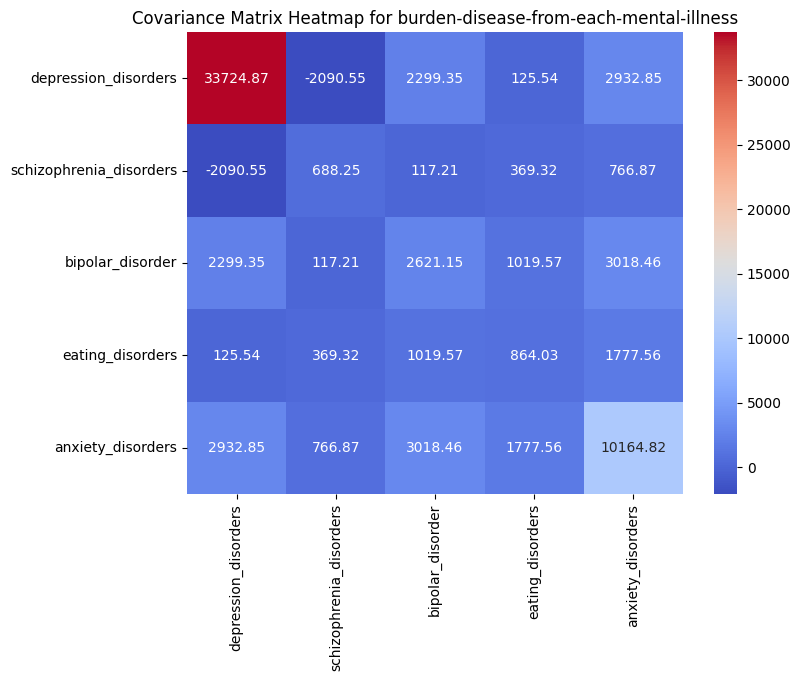

         Variable 1         Variable 2  Correlation   Covariance
0  bipolar_disorder   eating_disorders     0.677496  1019.569393
1  bipolar_disorder  anxiety_disorders     0.584777  3018.464103
2  eating_disorders  anxiety_disorders     0.599805  1777.559998


In [12]:
cov_matrix = df_skip.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Covariance Matrix Heatmap for burden-disease-from-each-mental-illness")
plt.show()

strong_corr_pairs = []

# Find pairs of variables with strong correlation (|corr| >= 0.5) and their covariance
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) >= 0.5:
            cov_val = cov_matrix.loc[col1, col2]
            strong_corr_pairs.append((col1, col2, corr_val, cov_val))
result_df = pd.DataFrame(strong_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation', 'Covariance'])
print(result_df)

| Pair                            | Correlation | Covariance | Interpretation                                                        |
| ------------------------------- | ----------- | ---------- | --------------------------------------------------------------------- |
| **Bipolar & Eating Disorders**  | 0.677       | 1019.57    | Strong linear relationship, large shared variance                     |
| **Bipolar & Anxiety Disorders** | 0.585       | 3018.46    | Strong correlation with very high covariance (high unit variance too) |
| **Eating & Anxiety Disorders**  | 0.600       | 1777.56    | Strong correlation, moderate-to-high covariance                       |



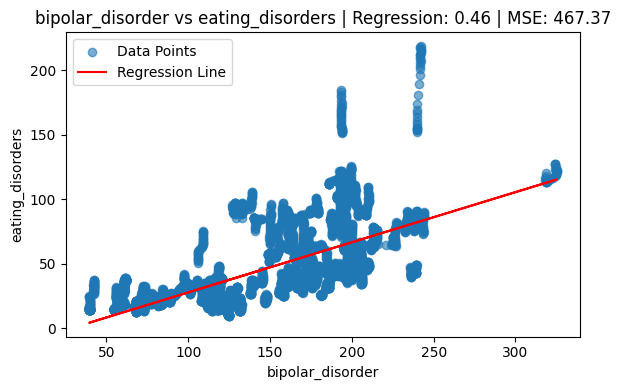

In [13]:
col_x = "bipolar_disorder"
col_y = "eating_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

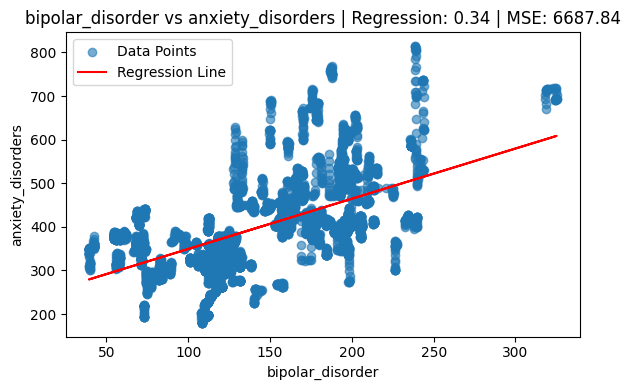

In [14]:
col_x = "bipolar_disorder"
col_y = "anxiety_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

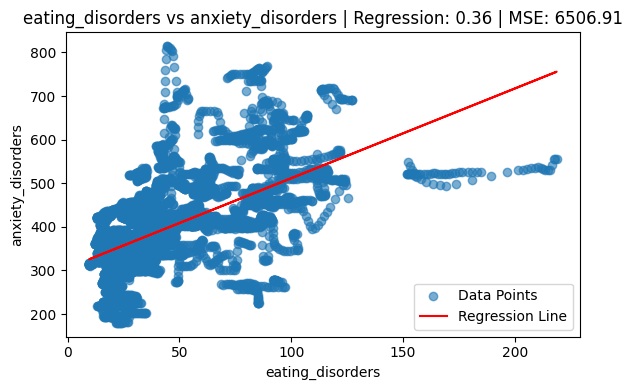

In [15]:
col_x = "eating_disorders"
col_y = "anxiety_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

## adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses

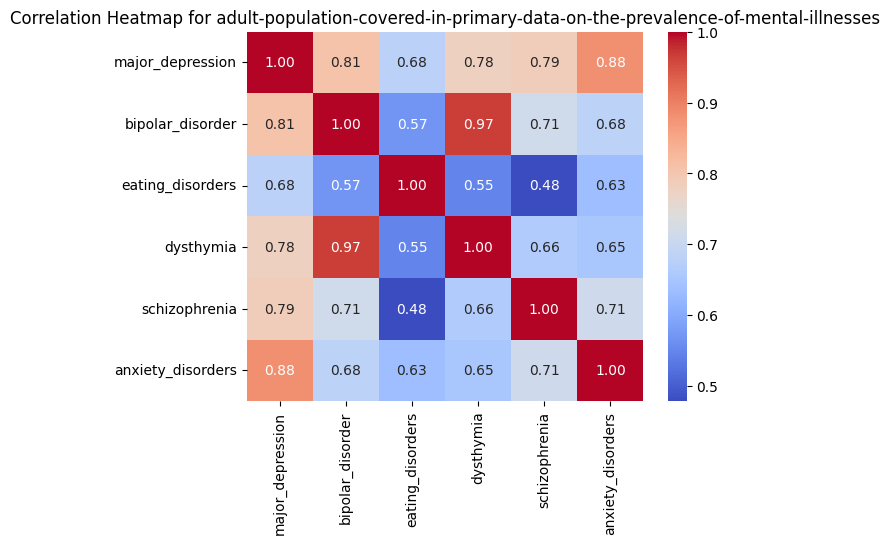

In [16]:
df_skip = dataframes['4-adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv'].iloc[:, 2:]
df_skip = df_skip.apply(pd.to_numeric, errors='coerce')
corr_matrix = df_skip.corr()
#draw heatmap for correlation matrix for tables that has more than 2 columns
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses')
plt.show()

| Pair                                 | Correlation | Interpretation                                            |
| ------------------------------------ | ----------- | --------------------------------------------------------- |
| **Bipolar & Dysthymia**              | **0.97**    | Extremely strong linear relationship (possibly collinear) |
| **Major Depression & Anxiety**       | **0.88**    | Strong relationship — high comorbidity                    |
| **Major Depression & Bipolar**       | **0.81**    | Very strong correlation                                   |
| **Schizophrenia & Major Depression** | **0.79**    | Strong correlation                                        |
| **Schizophrenia & Dysthymia**        | **0.66**    | Moderate-to-strong                                        |
| **Eating Disorders & Schizophrenia** | **0.48**    | Weakest among this group, still moderate                  |
| **Eating Disorders & Dysthymia**     | **0.55**    | Moderate                                                  |

There’s very strong multicollinearity in this dataset, especially between:

    Bipolar & Dysthymia

    Depression & Anxiety

This suggests that some disorders may overlap heavily in how they're reported or co-diagnosed in populations.



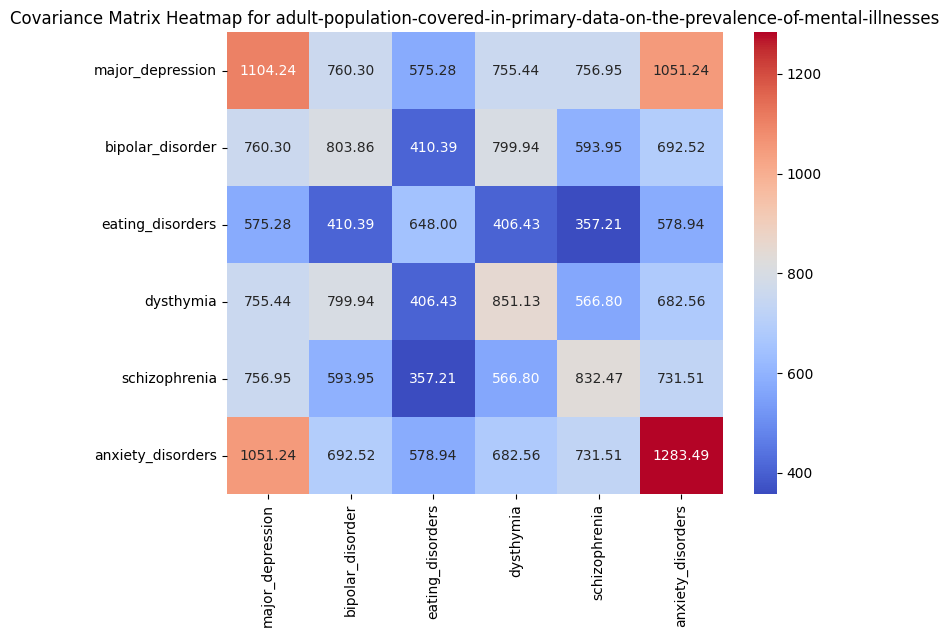

          Variable 1         Variable 2  Correlation   Covariance
0   major_depression   bipolar_disorder     0.806979   760.297294
1   major_depression   eating_disorders     0.680074   575.275130
2   major_depression          dysthymia     0.779241   755.440823
3   major_depression      schizophrenia     0.785425   756.948286
4   major_depression  anxiety_disorders     0.883026  1051.238009
5   bipolar_disorder   eating_disorders     0.568619   410.393139
6   bipolar_disorder          dysthymia     0.967097   799.941385
7   bipolar_disorder      schizophrenia     0.714208   593.946929
8   bipolar_disorder  anxiety_disorders     0.681782   692.520130
9   eating_disorders          dysthymia     0.547261   406.425541
10  eating_disorders  anxiety_disorders     0.634816   578.939567
11         dysthymia      schizophrenia     0.662948   566.795714
12         dysthymia  anxiety_disorders     0.653048   682.558052
13     schizophrenia  anxiety_disorders     0.712477   731.510786


In [17]:
cov_matrix = df_skip.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Covariance Matrix Heatmap for adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses")
plt.show()

strong_corr_pairs = []

# Find pairs of variables with strong correlation (|corr| >= 0.5) and their covariance
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) >= 0.5:
            cov_val = cov_matrix.loc[col1, col2]
            strong_corr_pairs.append((col1, col2, corr_val, cov_val))
result_df = pd.DataFrame(strong_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation', 'Covariance'])
print(result_df)

| Variable Pair                  | Correlation | Covariance | Insight                                            |
| ------------------------------ | ----------- | ---------- | -------------------------------------------------- |
| **Major Depression & Anxiety** | 0.86        | 1051.24    | Very strong relationship and shared variability    |
| **Anxiety & Schizophrenia**    | 0.71        | 731.51     | Strong correlation and variance overlap            |
| **Depression & Schizophrenia** | 0.79        | 756.95     | High relationship — consistent population patterns |
| **Bipolar & Dysthymia**        | 0.97        | 799.94     | Nearly perfect correlation — potentially redundant |


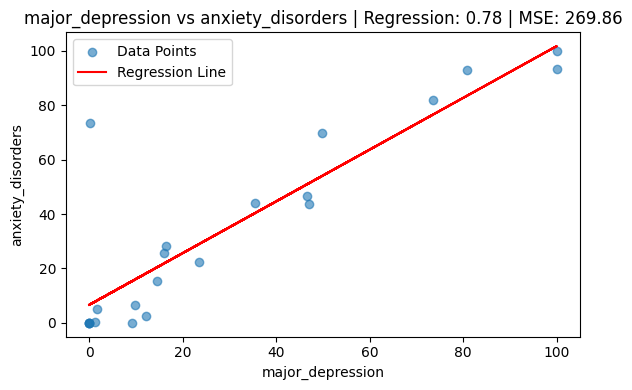

In [18]:
col_x = "major_depression"
col_y = "anxiety_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

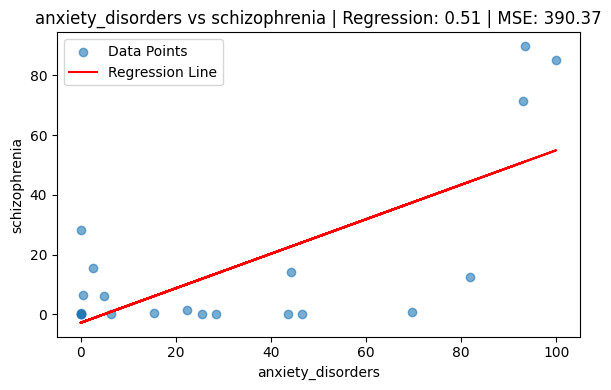

In [19]:
col_x = "anxiety_disorders"
col_y = "schizophrenia"

df_pair = df_skip[[col_x, col_y]].dropna()

X = df_pair[[col_x]]
y = df_pair[col_y]

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

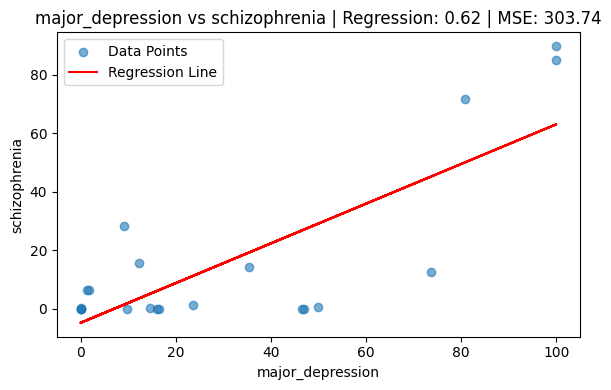

In [20]:
col_x = "major_depression"
col_y = "schizophrenia"
df_pair = df_skip[[col_x, col_y]].dropna()

X = df_pair[[col_x]]
y = df_pair[col_y]

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

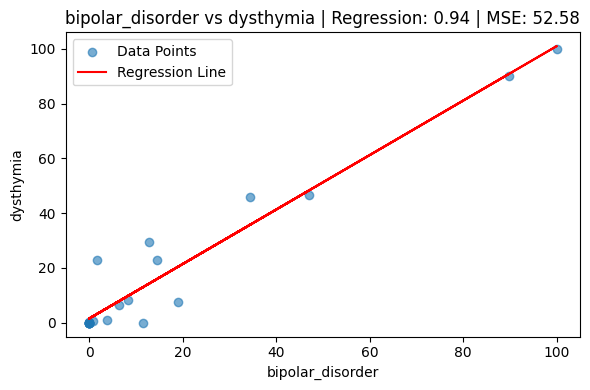

In [21]:
col_x = "bipolar_disorder"
col_y = "dysthymia"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

## anxiety-disorders-treatment-gap

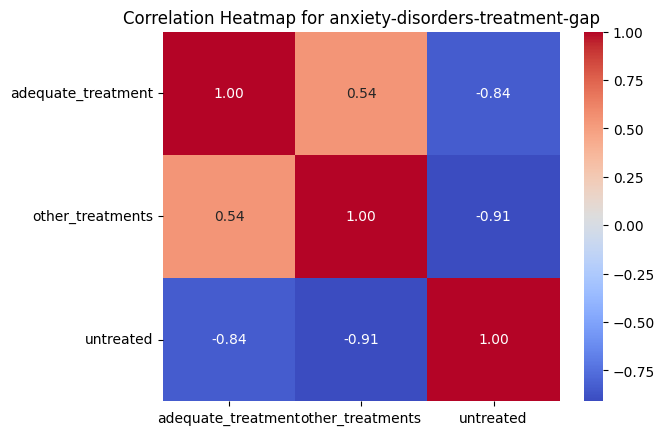

In [22]:
df_skip = dataframes['5-anxiety-disorders-treatment-gap.csv'].iloc[:, 2:]
df_skip = df_skip.apply(pd.to_numeric, errors='coerce')
corr_matrix = df_skip.corr()
#draw heatmap for correlation matrix for tables that has more than 2 columns
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for anxiety-disorders-treatment-gap')
plt.show()

| Pair                                         | Correlation | Interpretation                    |
| -------------------------------------------- | ----------- | --------------------------------- |
| **adequate\_treatment vs untreated**         | **–0.84**   | Strong negative relationship      |
| **other\_treatments vs untreated**           | **–0.91**   | Very strong negative relationship |
| **adequate\_treatment vs other\_treatments** | **+0.54**   | Moderate positive relationship    |

Untreated rates are strongly negatively correlated with both adequate_treatment and other_treatments.
 -> As more people receive any kind of treatment, fewer remain untreated, which makes perfect sense.

adequate_treatment and other_treatments are moderately positively correlated, suggesting that in populations with high treatment coverage, both proper and suboptimal treatments tend to rise together.

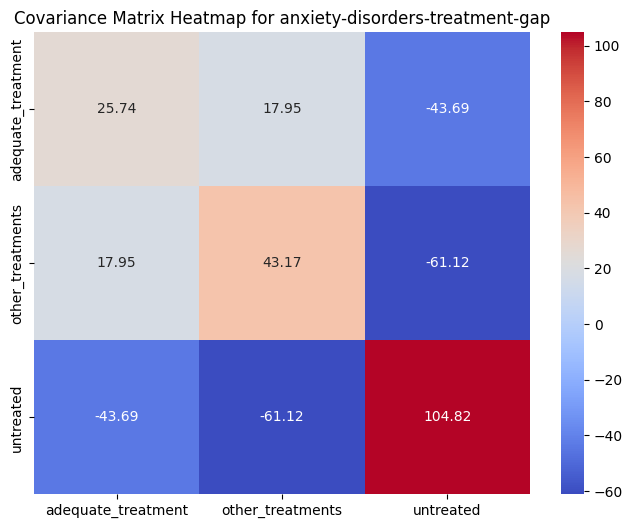

           Variable 1        Variable 2  Correlation  Covariance
0  adequate_treatment  other_treatments     0.538573   17.953538
1  adequate_treatment         untreated    -0.841193  -43.694523
2    other_treatments         untreated    -0.908656  -61.123892


In [23]:
cov_matrix = df_skip.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Covariance Matrix Heatmap for anxiety-disorders-treatment-gap")
plt.show()

strong_corr_pairs = []

# Find pairs of variables with strong correlation (|corr| >= 0.5) and their covariance
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) >= 0.5:
            cov_val = cov_matrix.loc[col1, col2]
            strong_corr_pairs.append((col1, col2, corr_val, cov_val))
result_df = pd.DataFrame(strong_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation', 'Covariance'])
print(result_df)

| Variable Pair                     | Correlation | Covariance | Interpretation                                                                       |
| --------------------------------- | ----------- | ---------- | ------------------------------------------------------------------------------------ |
| **Adequate vs Other Treatments**  | +0.54       | 17.95      | Moderate positive correlation — as one increases, so does the other                  |
| **Adequate vs Untreated**         | –0.84       | –43.69     | Strong negative correlation — more adequate treatment → fewer untreated              |
| **Other Treatments vs Untreated** | –0.91       | –61.12     | Very strong negative correlation — reflects shift from untreated to alternative care |


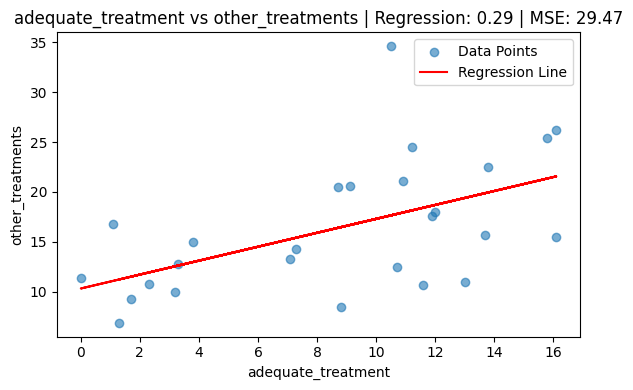

In [24]:
col_x = "adequate_treatment"
col_y = "other_treatments"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

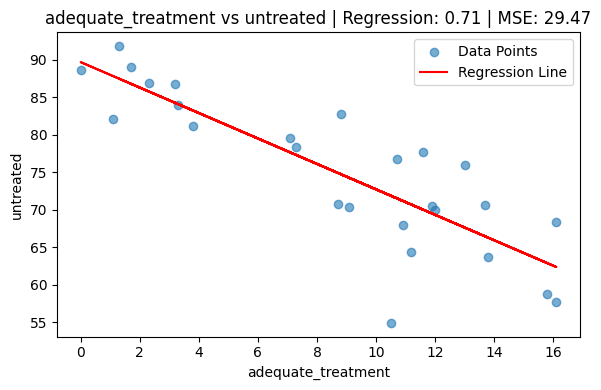

In [25]:
col_x = "adequate_treatment"
col_y = "untreated"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

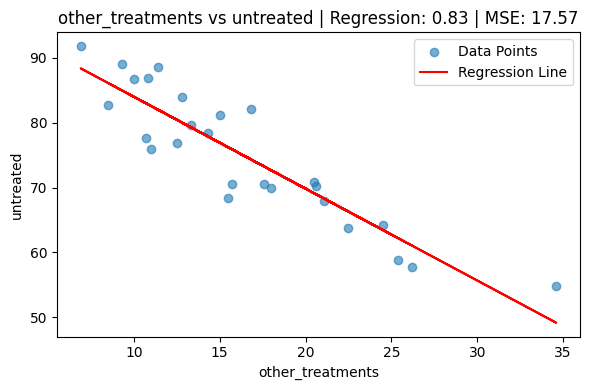

In [26]:
col_x = "other_treatments"
col_y = "untreated"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Histogram

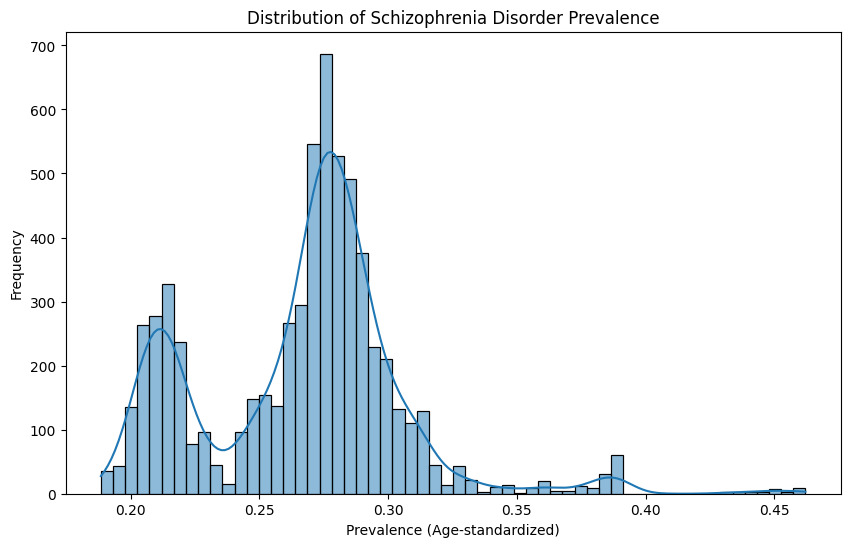

In [27]:
# Example histogram for a targeted variable
# Below this cell will be histograms for all
plt.figure(figsize=(10, 6))
sns.histplot(dfs[0]['schizophrenia_disorders'], kde=True)
plt.title('Distribution of Schizophrenia Disorder Prevalence')
plt.xlabel('Prevalence (Age-standardized)')
plt.ylabel('Frequency')
plt.show()


Plotting histograms for DataFrame 0


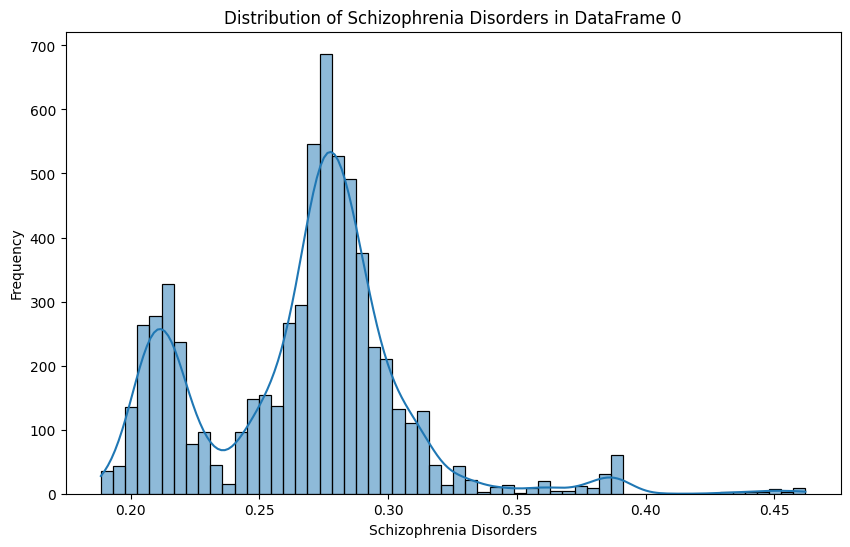

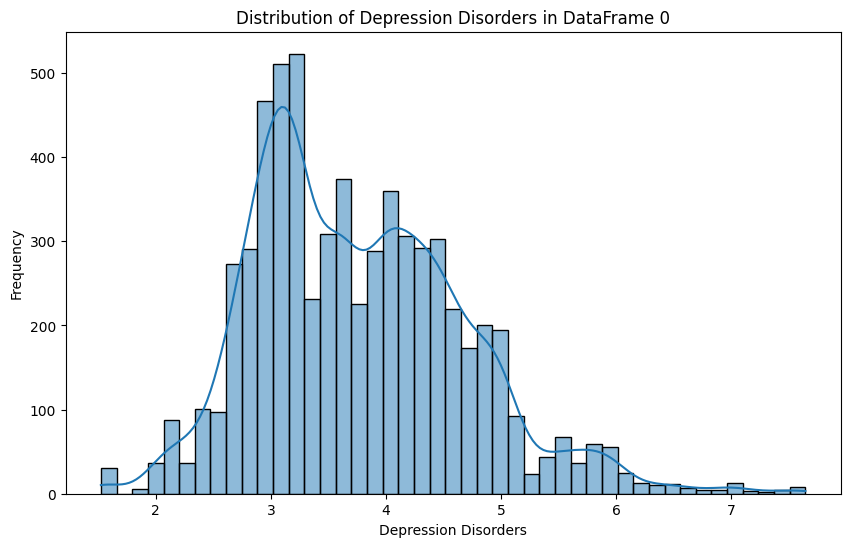

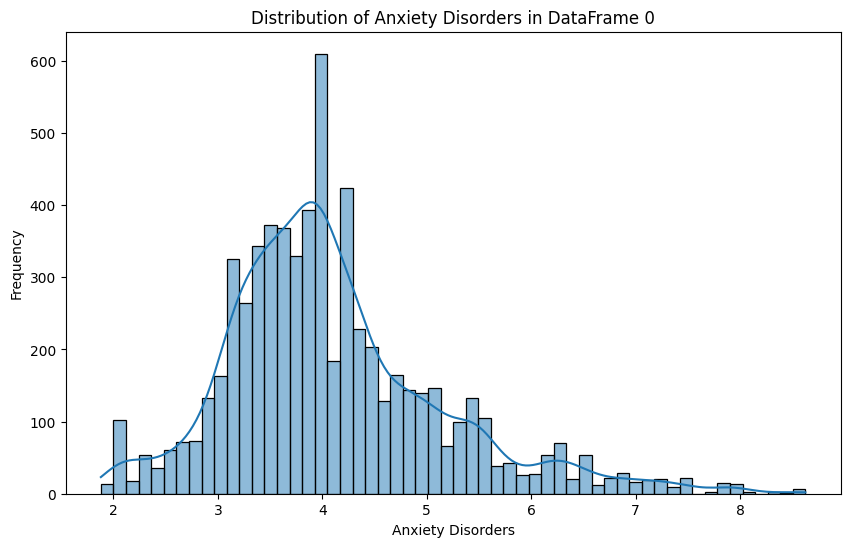

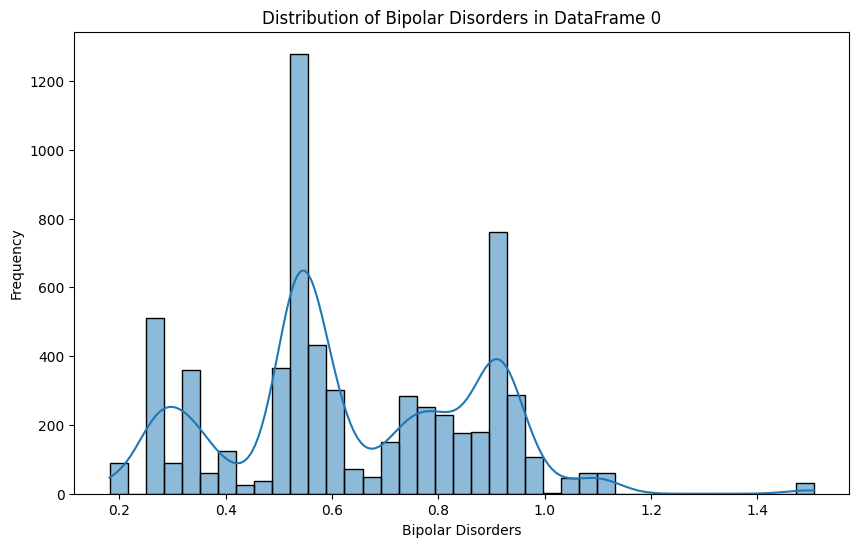

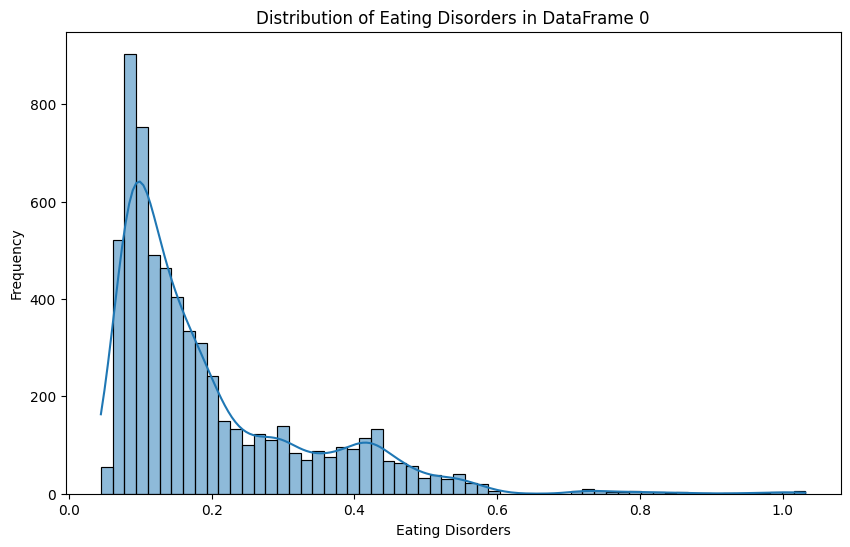


Plotting histograms for DataFrame 1


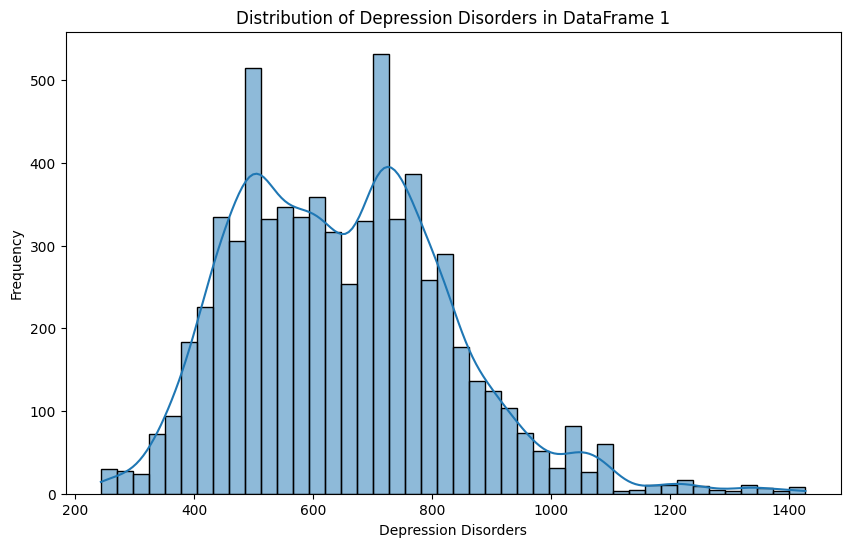

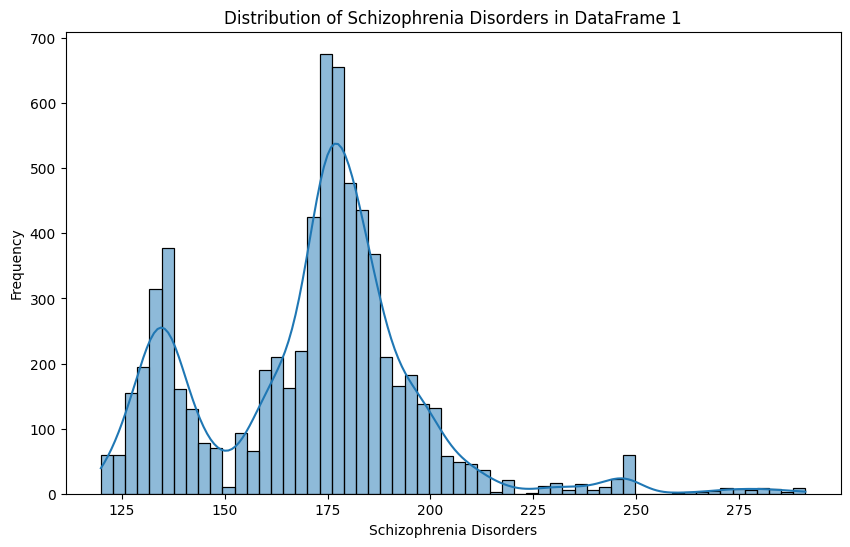

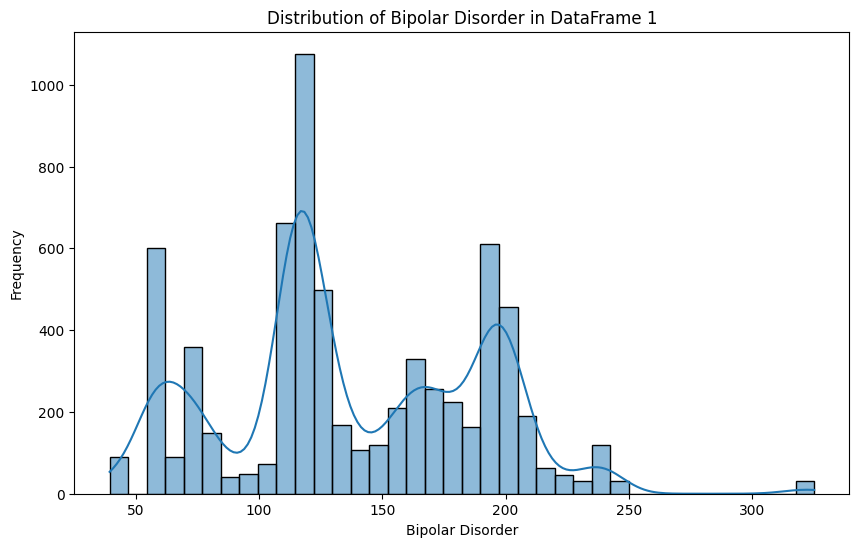

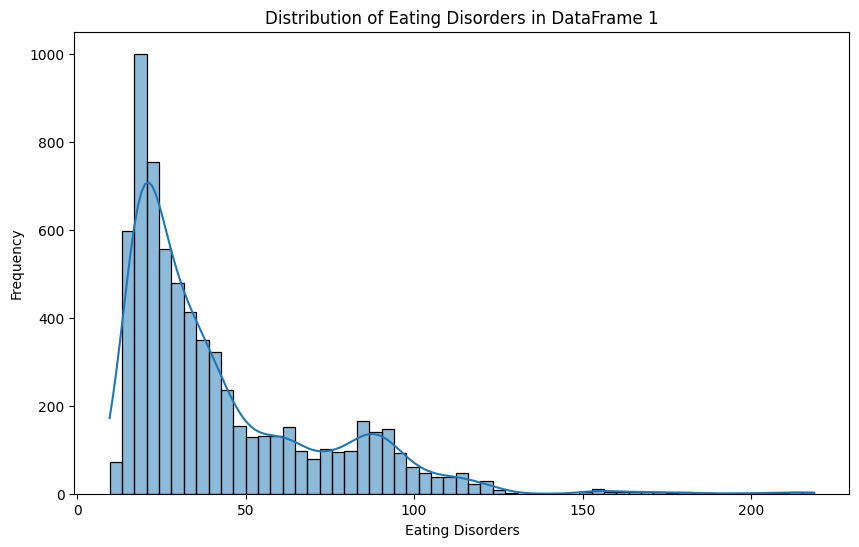

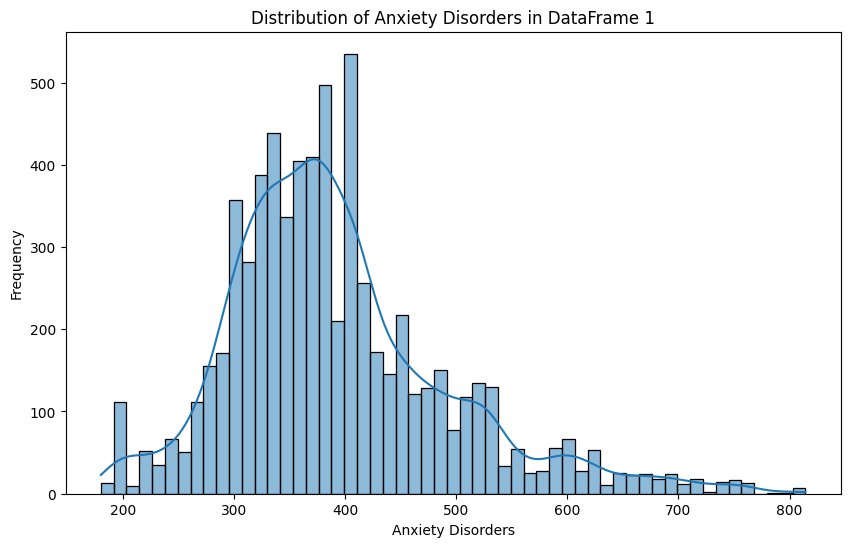


Plotting histograms for DataFrame 2


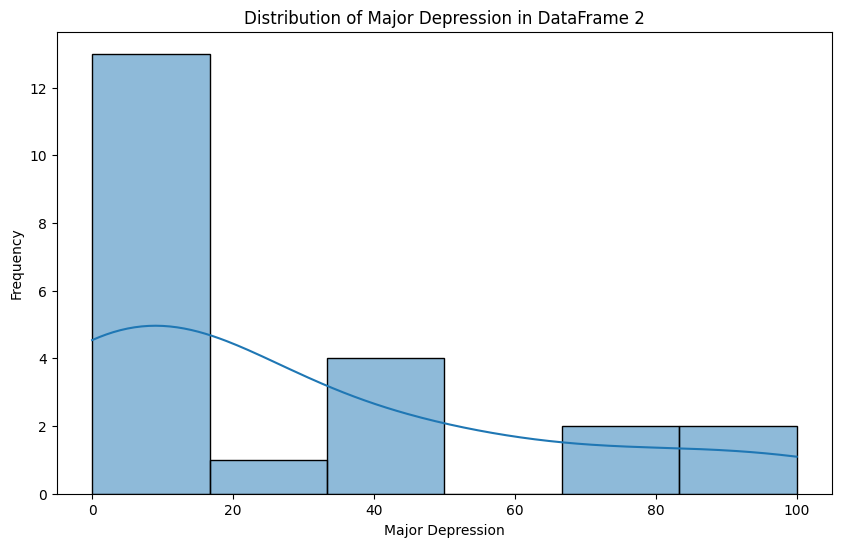


Plotting histograms for DataFrame 3


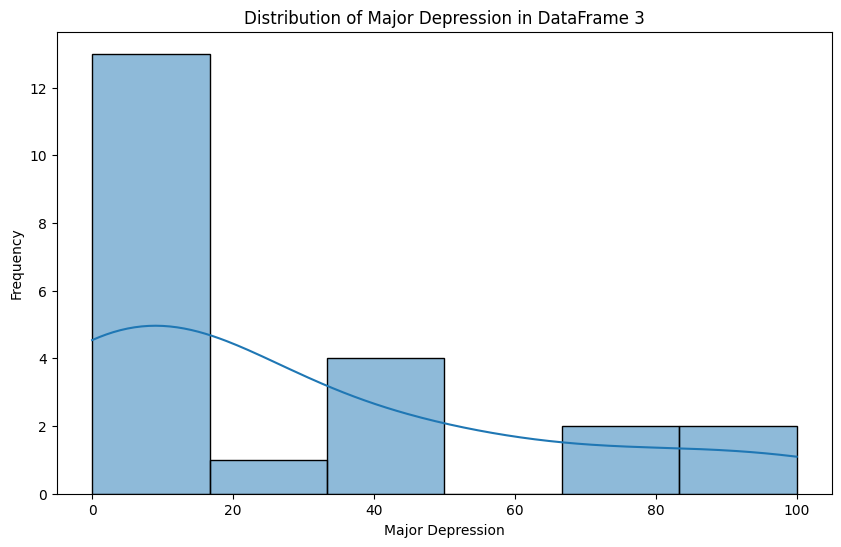

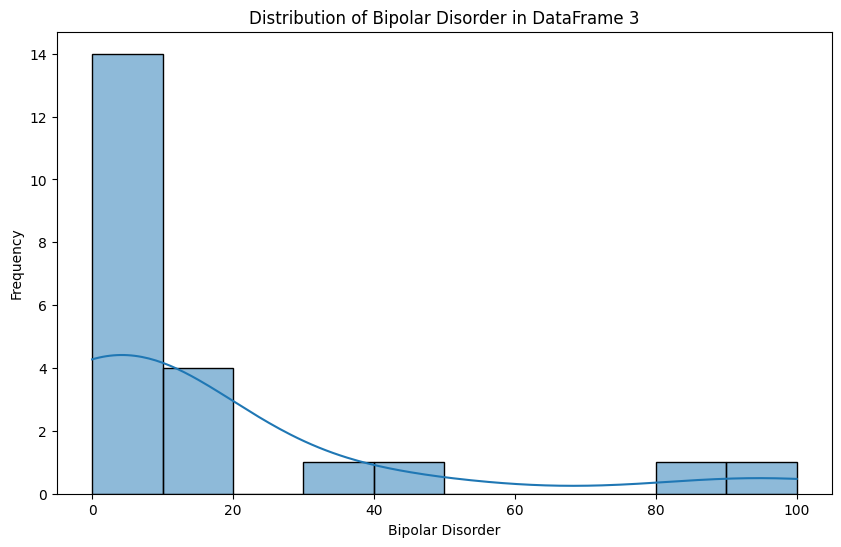

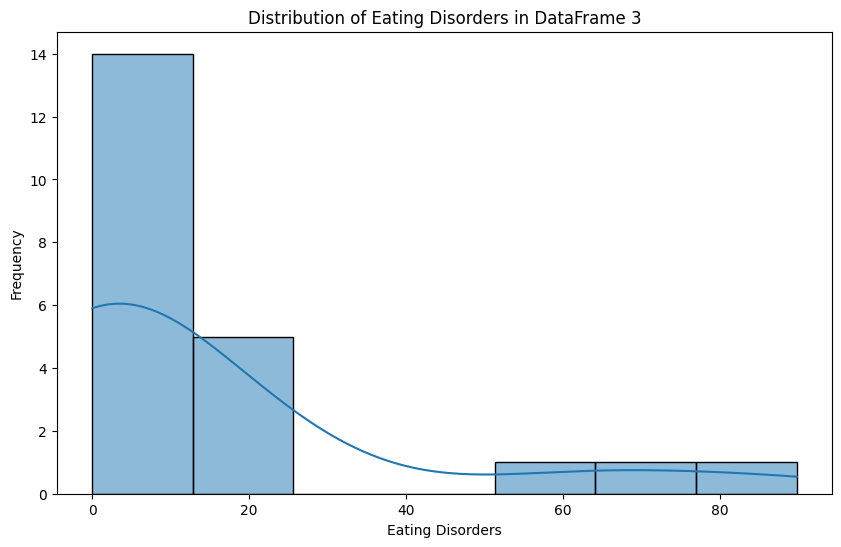

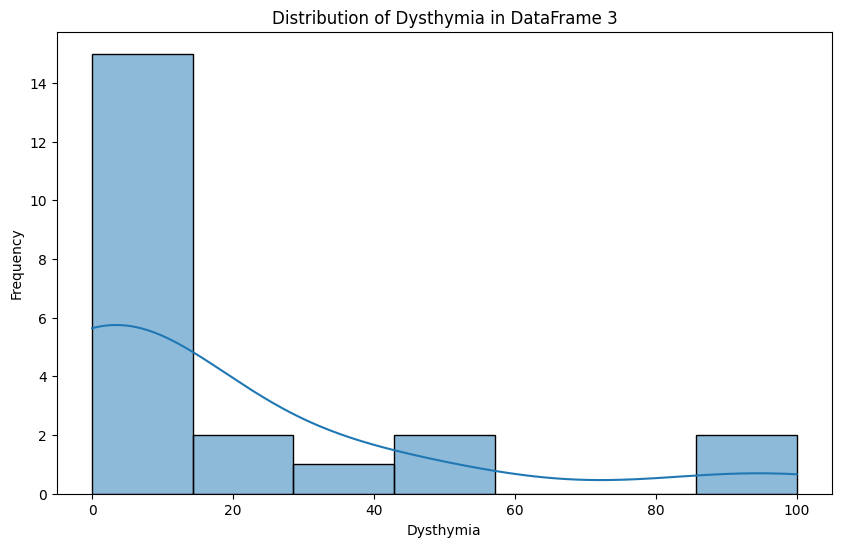

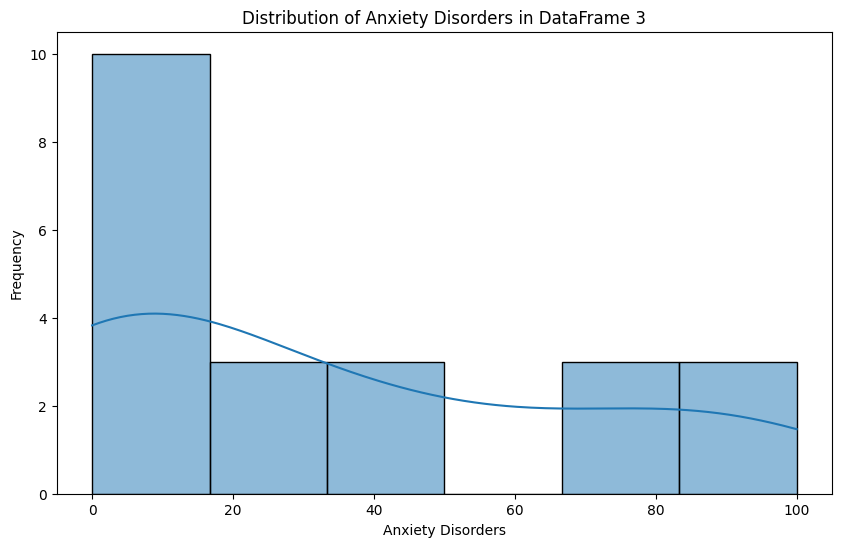


Plotting histograms for DataFrame 4


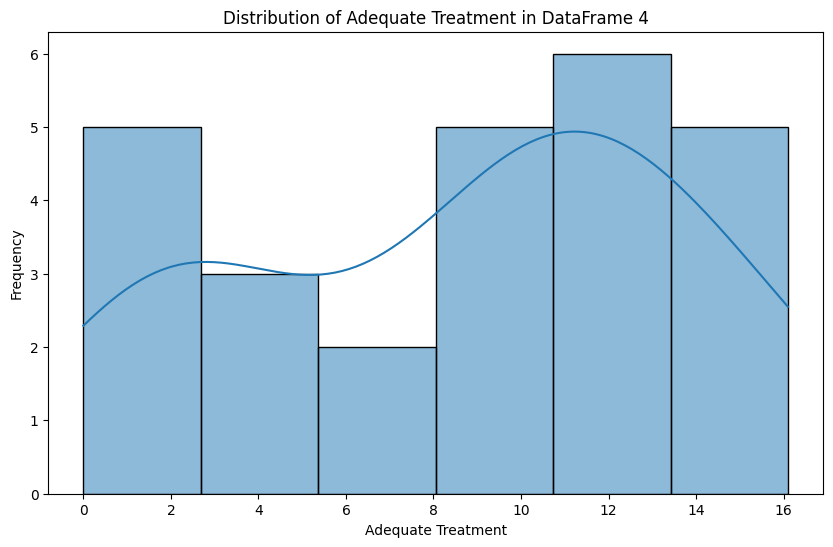

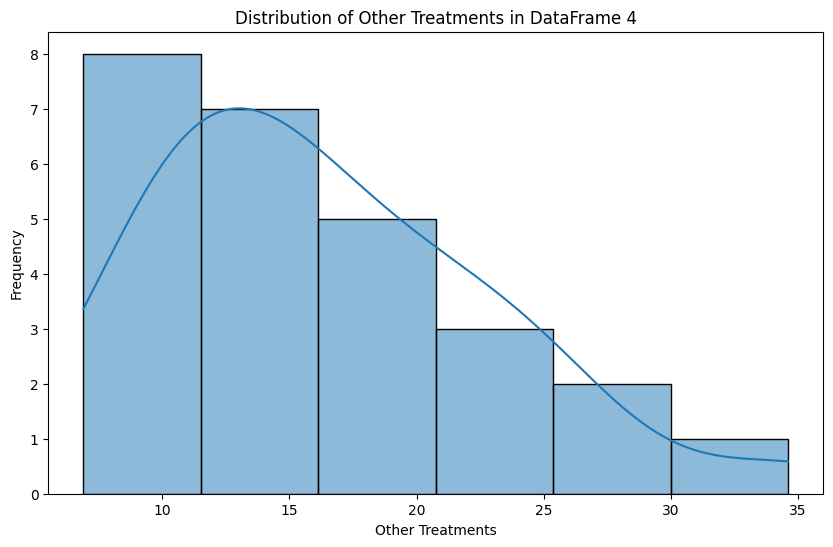

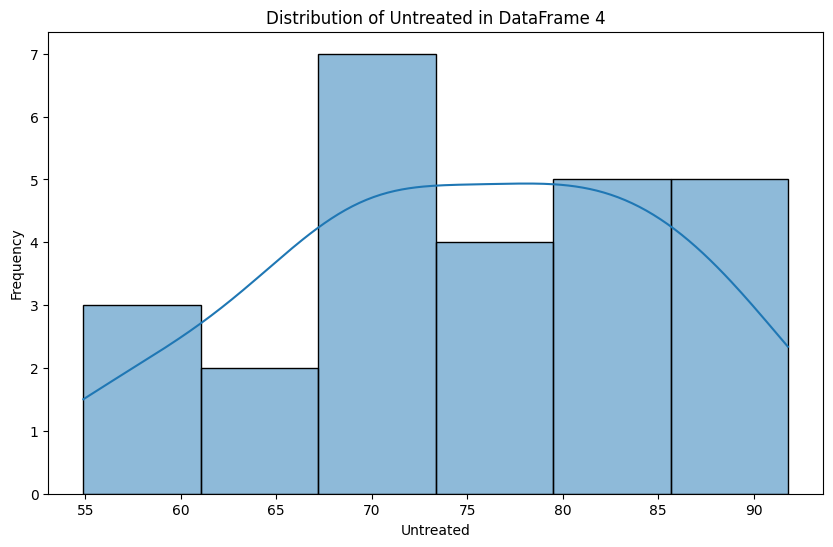


Plotting histograms for DataFrame 5


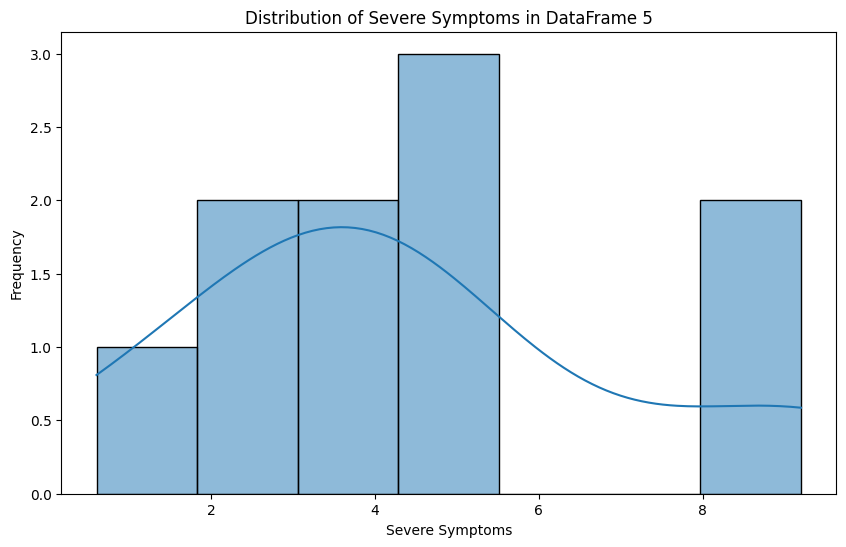

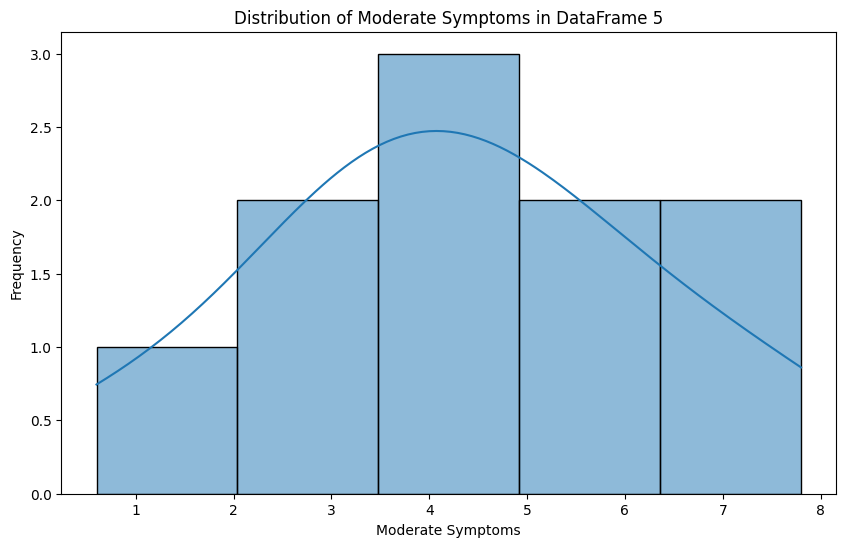

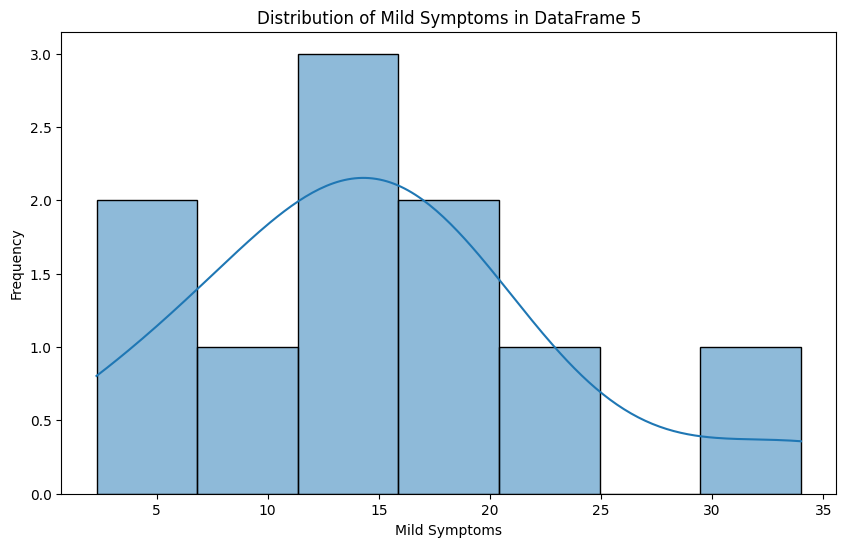

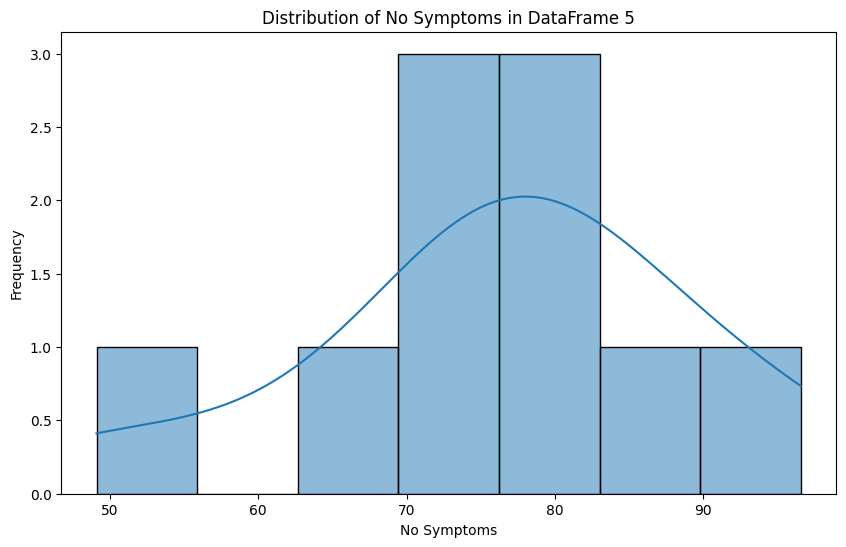


Plotting histograms for DataFrame 6


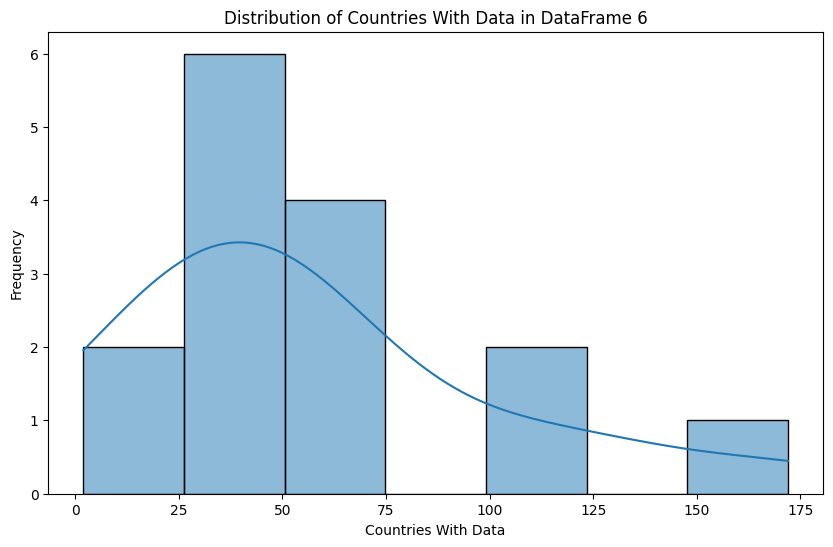

In [28]:
# Function to generate histograms for all numeric columns except 'year'
def plot_histograms(dfs):
  """
    Generates and displays histograms for all numeric columns in each DataFrame
    in the list, skipping the 'year' column if it exists.

    Parameters:
    -----------
    dfs : list of pandas.DataFrame
        A list of DataFrames to plot histograms from.
  """
  for i, df in enumerate(dfs):
    print(f"\nPlotting histograms for DataFrame {i}")
    for col in df.select_dtypes(include='number').columns:
      if col != 'year':  # Skip the 'year' column
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True) # Drop NA values for plotting
        plt.title(f'Distribution of {col.replace("_", " ").title()} in DataFrame {i}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Frequency')
        plt.show()

# Call the function to plot histograms for all numeric columns except 'year'
plot_histograms(dfs)


In [31]:
columns_for_correlation = ['schizophrenia_disorders',
                                 'depression_disorders',
                                 'anxiety_disorders',
                                 'bipolar_disorders',
                                 'eating_disorders']

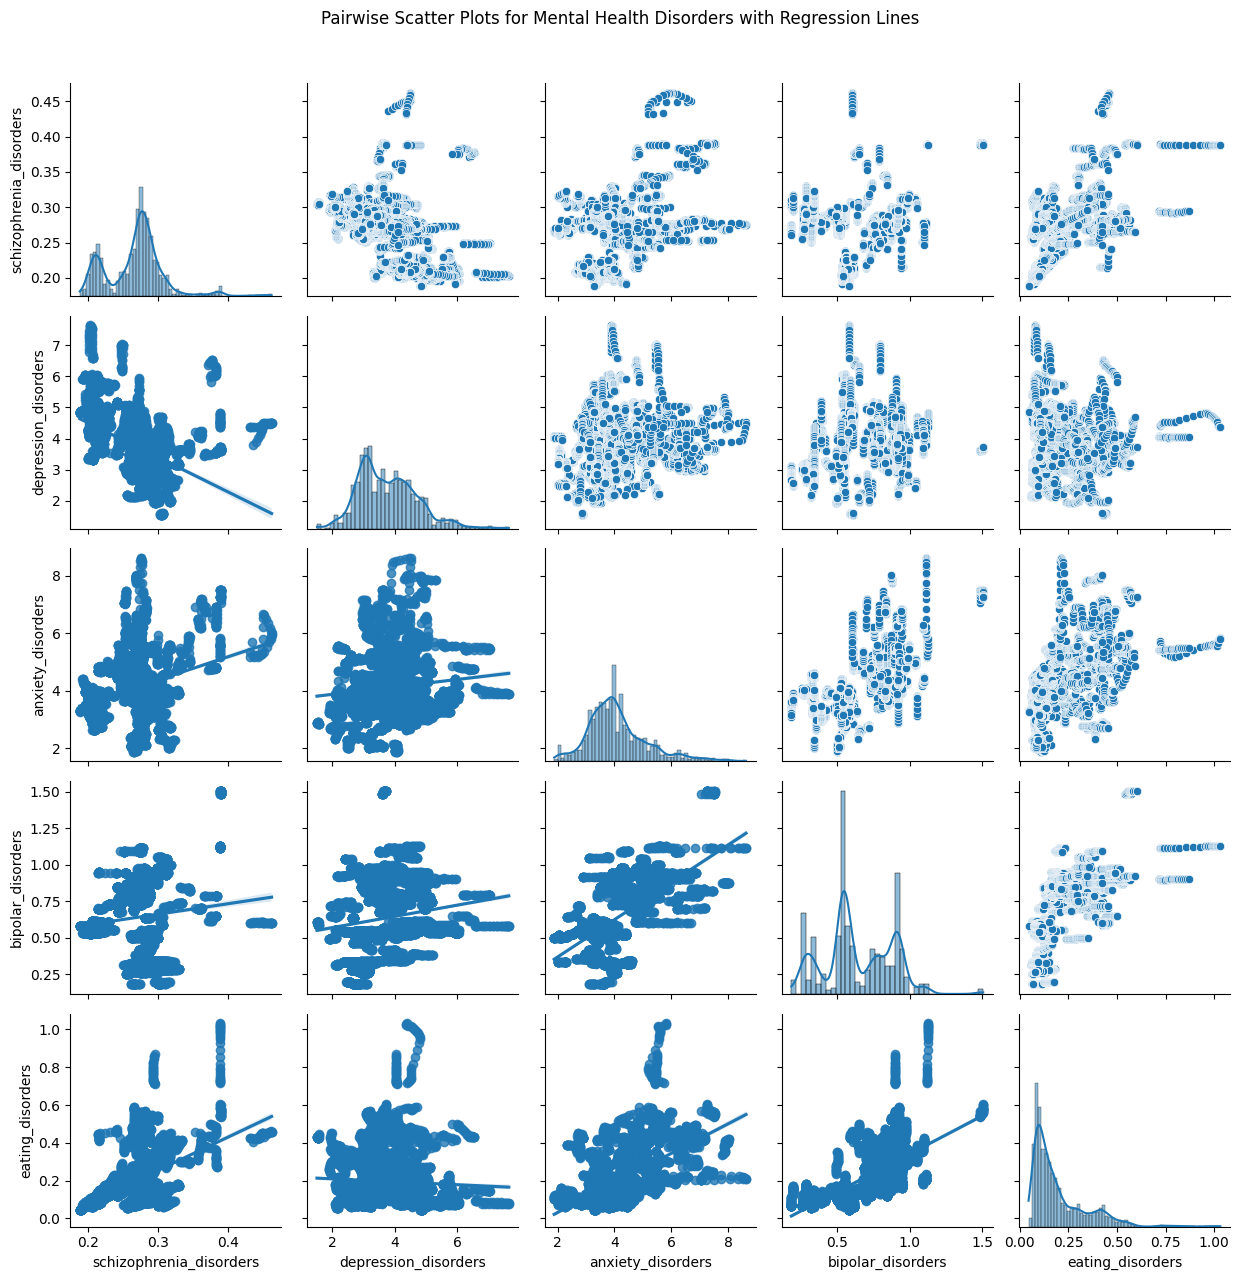

In [32]:
pair_grid = sns.PairGrid(dfs[0], vars=columns_for_correlation)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_lower(sns.regplot)
pair_grid.map_diag(sns.histplot, kde=True)
plt.suptitle('Pairwise Scatter Plots for Mental Health Disorders with Regression Lines', y=1.02)
plt.tight_layout()
plt.show()
# we need to make the points smaller I think.



Plotting scatter plots for DataFrame 0


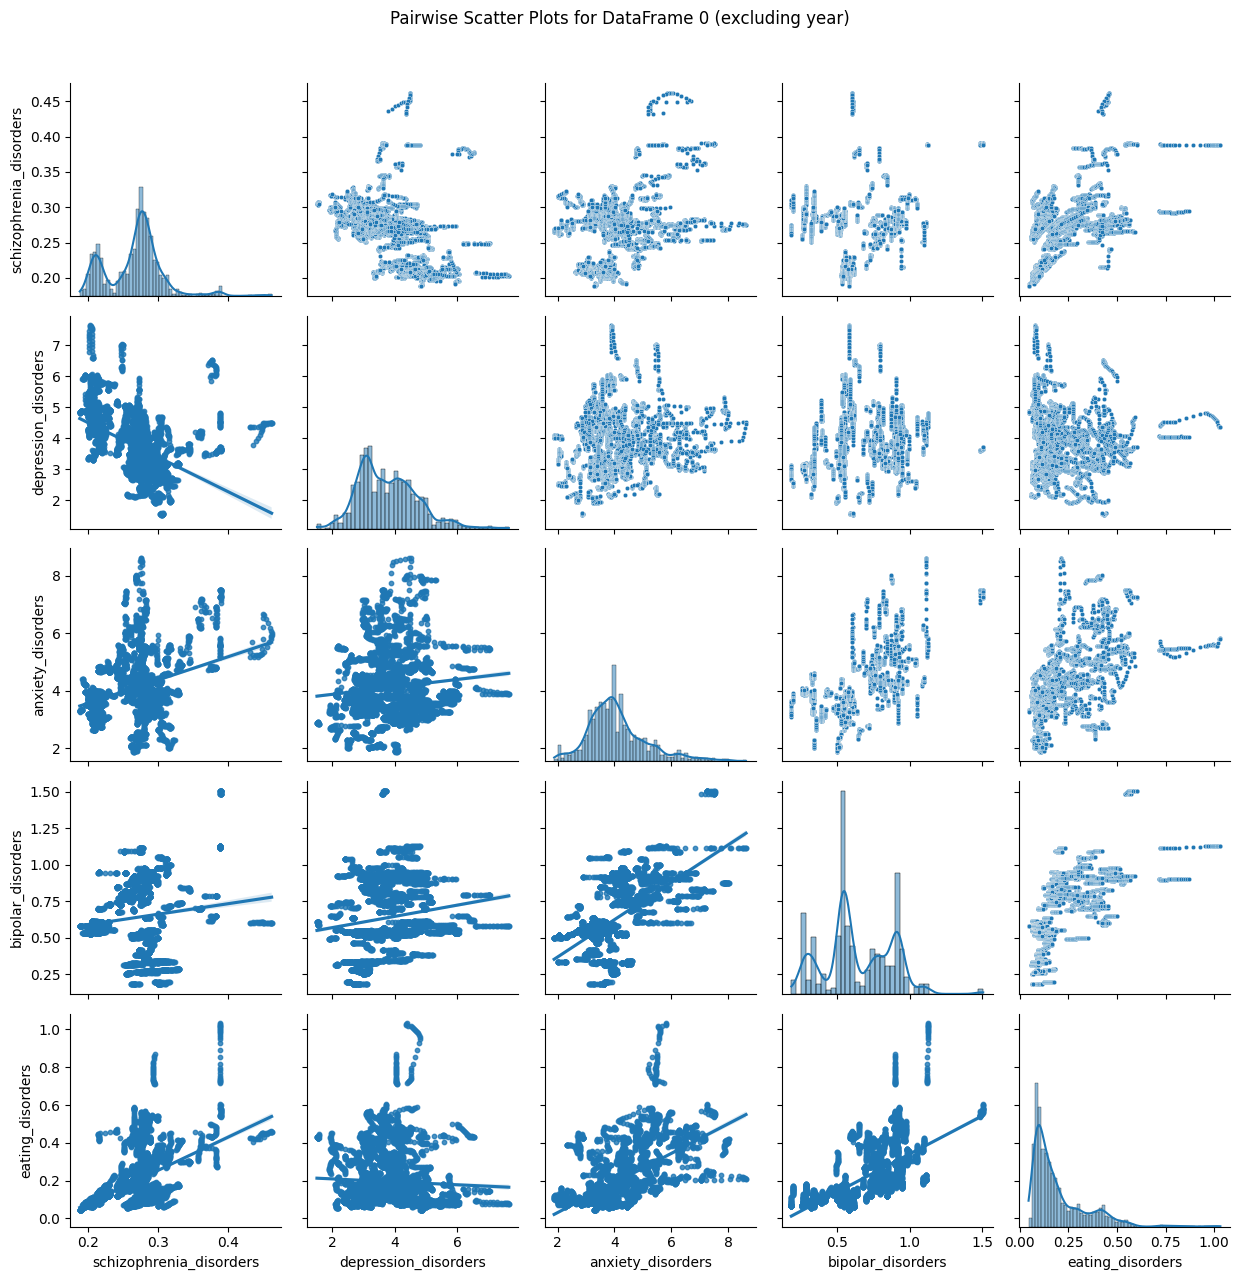


Plotting scatter plots for DataFrame 1


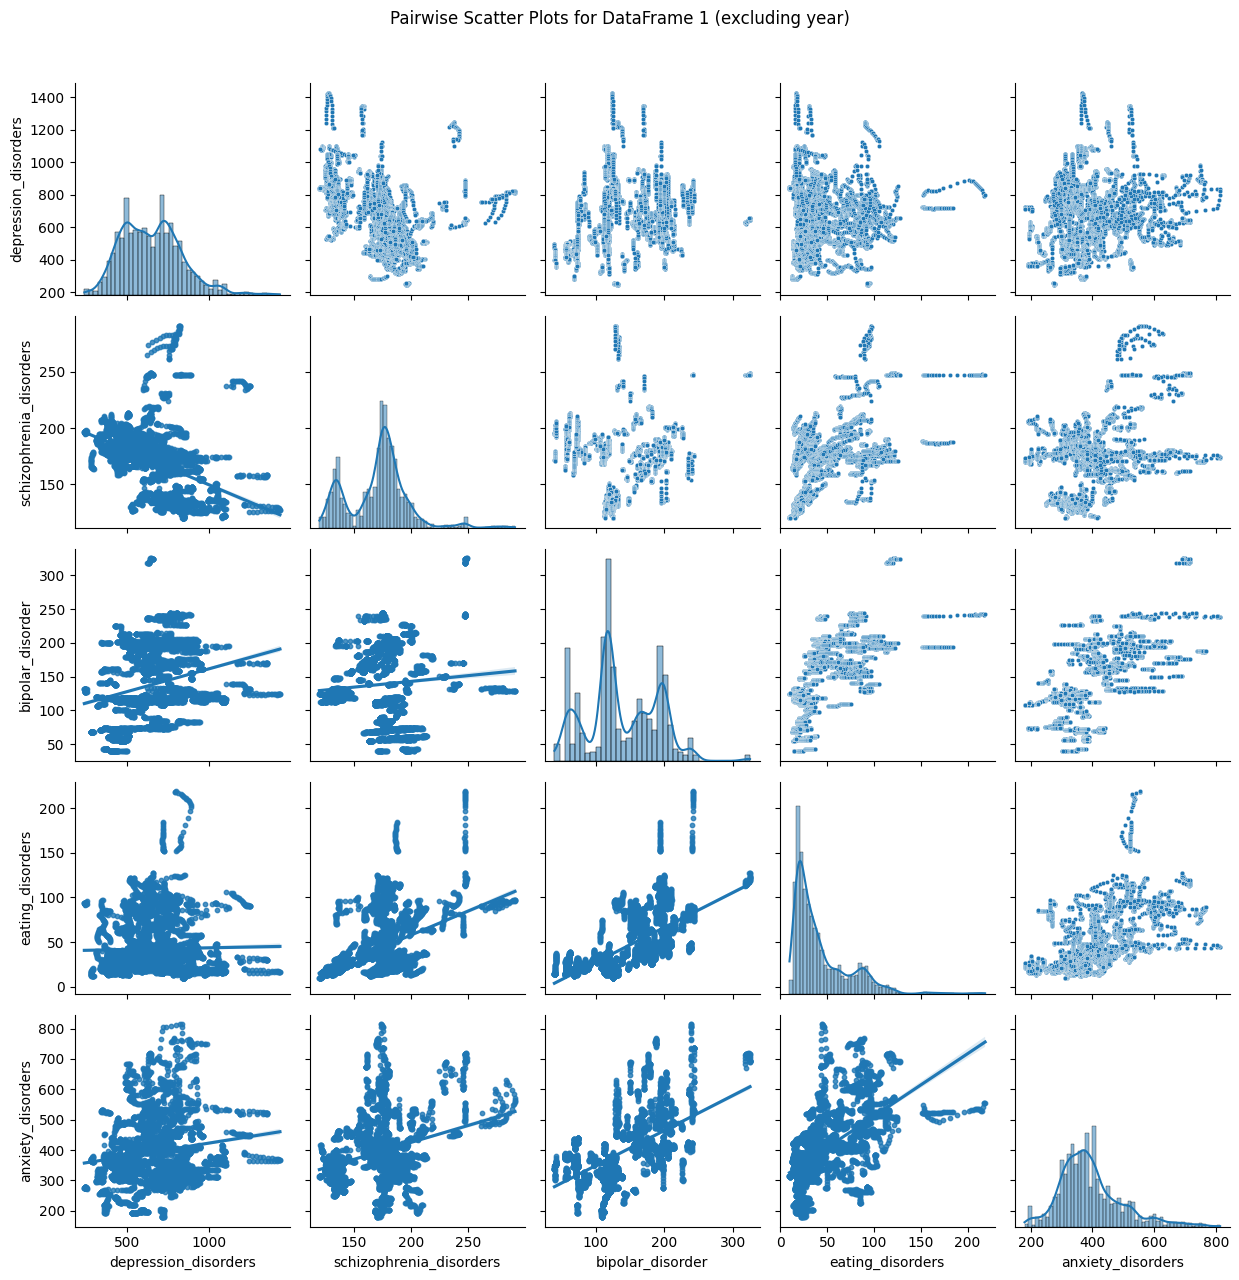


Plotting scatter plots for DataFrame 2
DataFrame 2 has less than two numeric columns to plot scatter plots for (excluding year). Skipping scatter plot.

Plotting scatter plots for DataFrame 3


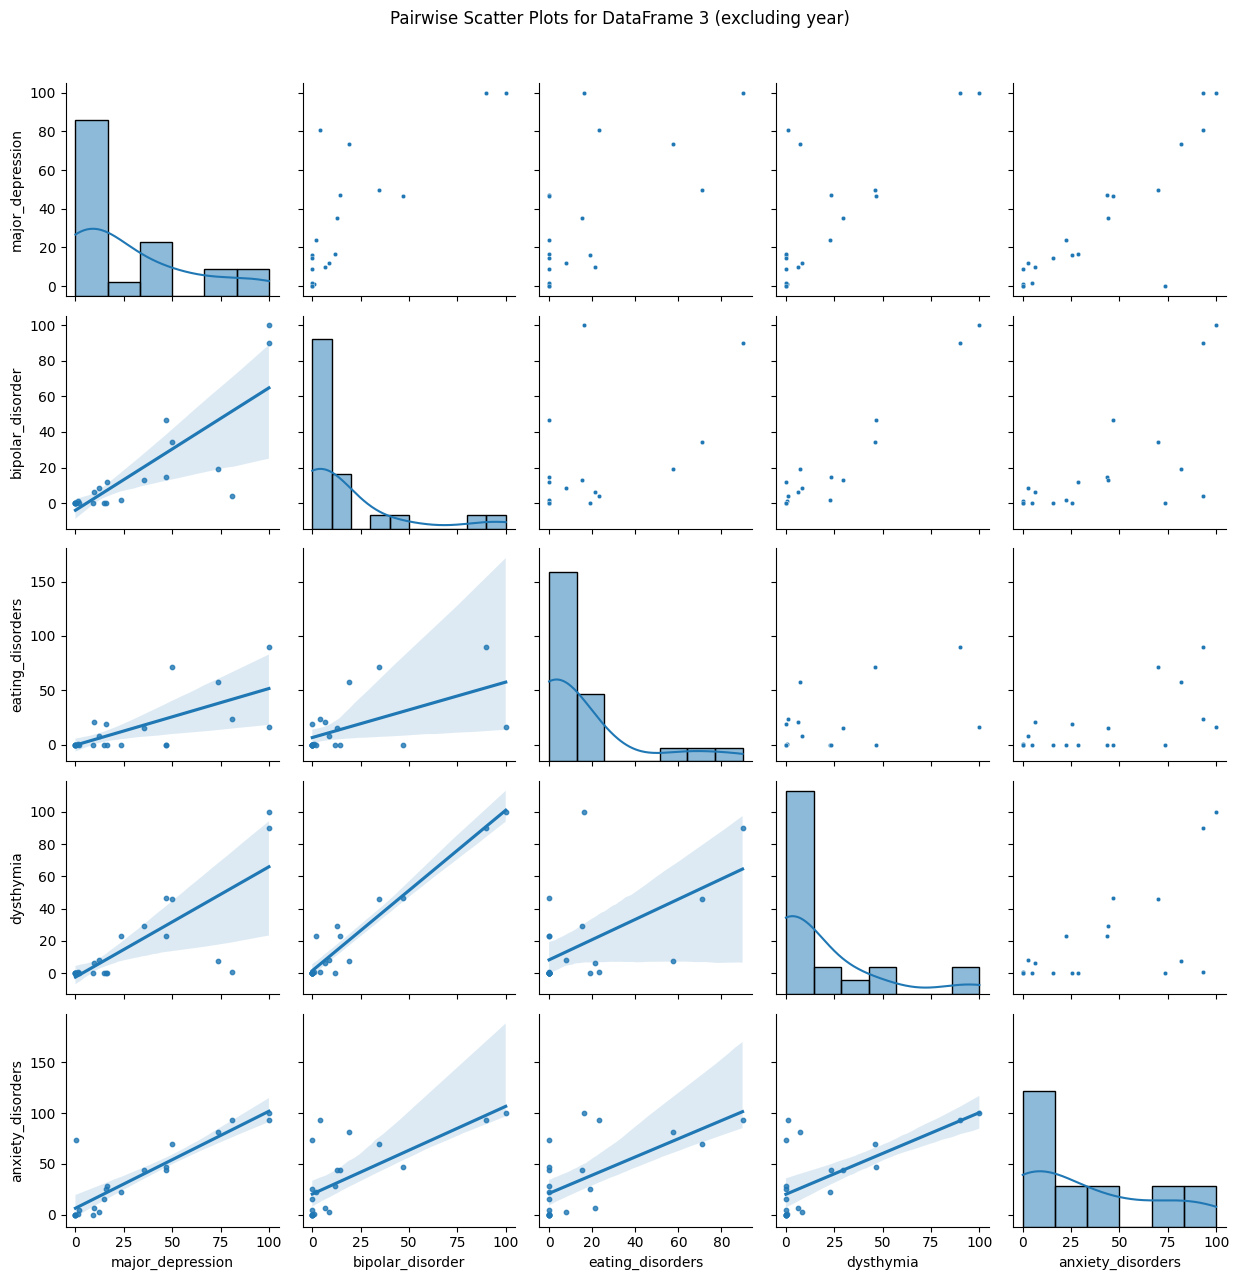


Plotting scatter plots for DataFrame 4


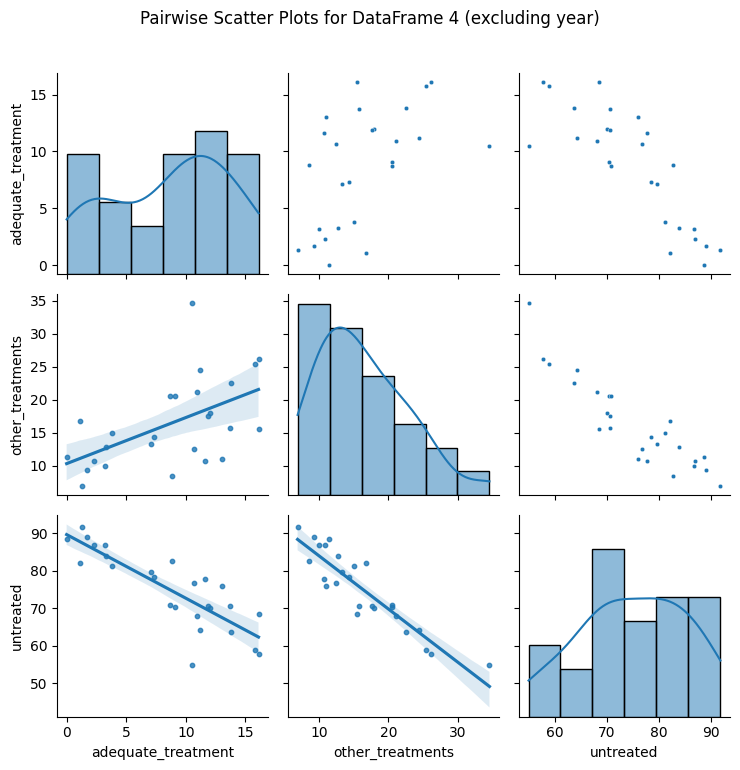


Plotting scatter plots for DataFrame 5


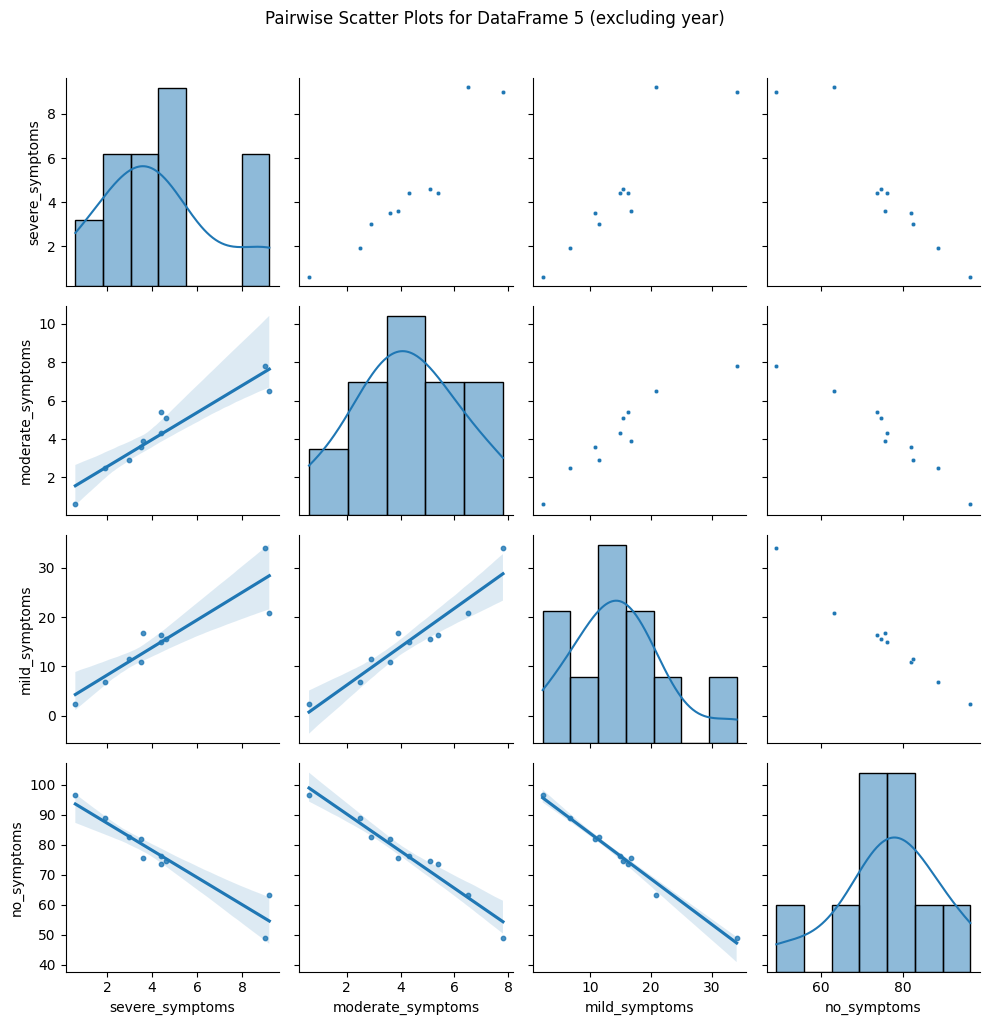


Plotting scatter plots for DataFrame 6
DataFrame 6 has less than two numeric columns to plot scatter plots for (excluding year). Skipping scatter plot.


In [33]:
# Generate more Scatter plots for more datasets
# Function to generate scatter plots for all numeric column pairs except 'year'
def plot_scatterplots(dfs):
  """
    Generates and displays scatter plots for all pairs of numeric columns
    in each DataFrame in the list, skipping the 'year' column if it exists.

    Parameters:
    -----------
    dfs : list of pandas.DataFrame
        A list of DataFrames to plot scatter plots from.
  """
  for i, df in enumerate(dfs):
    print(f"\nPlotting scatter plots for DataFrame {i}")
    numeric_cols = df.select_dtypes(include='number').columns
    # Filter out the 'year' column if it exists
    plot_cols = [col for col in numeric_cols if col != 'year']

    # Create a PairGrid for all pairwise scatter plots of numeric columns
    # Use a subset of columns if there are too many to avoid excessive plotting
    if len(plot_cols) > 1:
        # Limit the number of columns for plotting if it's too large
        max_cols_for_pairplot = 10
        if len(plot_cols) > max_cols_for_pairplot:
            print(f"DataFrame {i} has more than {max_cols_for_pairplot} numeric columns (excluding year). Plotting a subset.")
            # You might want to select specific columns here based on relevance
            # For now, just take the first max_cols_for_pairplot columns
            cols_to_plot = plot_cols[:max_cols_for_pairplot]
        else:
            cols_to_plot = plot_cols

        if len(cols_to_plot) > 1:
            pair_grid = sns.PairGrid(df, vars=cols_to_plot)
            # Use regplot for regression lines
            pair_grid.map_upper(sns.scatterplot, s=10) # smaller points
            pair_grid.map_lower(sns.regplot, scatter_kws={'s': 10}) # smaller points
            pair_grid.map_diag(sns.histplot, kde=True)

            plt.suptitle(f'Pairwise Scatter Plots for DataFrame {i} (excluding year)', y=1.02)
            plt.tight_layout()
            plt.show()
        else:
            print(f"DataFrame {i} has only one numeric column to plot scatter plots for (excluding year). Skipping scatter plot.")
    else:
        print(f"DataFrame {i} has less than two numeric columns to plot scatter plots for (excluding year). Skipping scatter plot.")

# Call the function to plot scatter plots for all datasets, excluding the year column
plot_scatterplots(dfs)


   schizophrenia_disorders  depression_disorders  anxiety_disorders  \
0                 0.223206              4.996118           4.713314   
1                 0.222454              4.989290           4.702100   
2                 0.221751              4.981346           4.683743   
3                 0.220987              4.976958           4.673549   
4                 0.220183              4.977782           4.670810   

   bipolar_disorders  eating_disorders  Cluster  
0           0.703023          0.127700        2  
1           0.702069          0.123256        2  
2           0.700792          0.118844        2  
3           0.700087          0.115089        2  
4           0.699898          0.111815        2  


<Figure size 2000x1000 with 0 Axes>

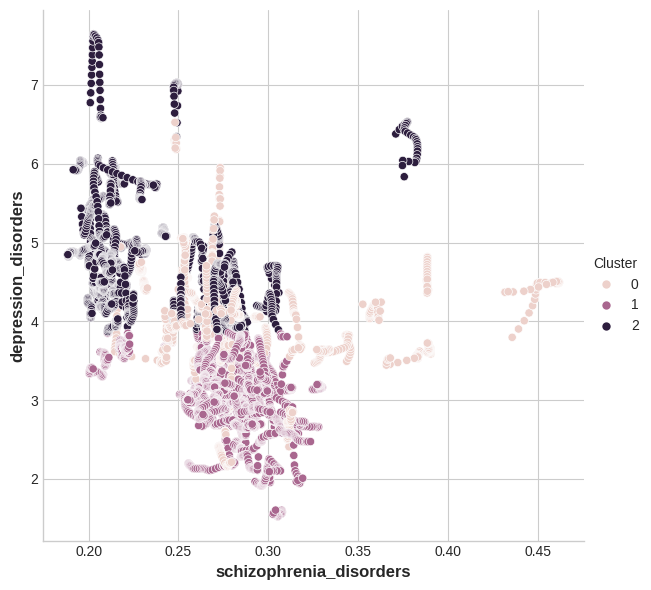

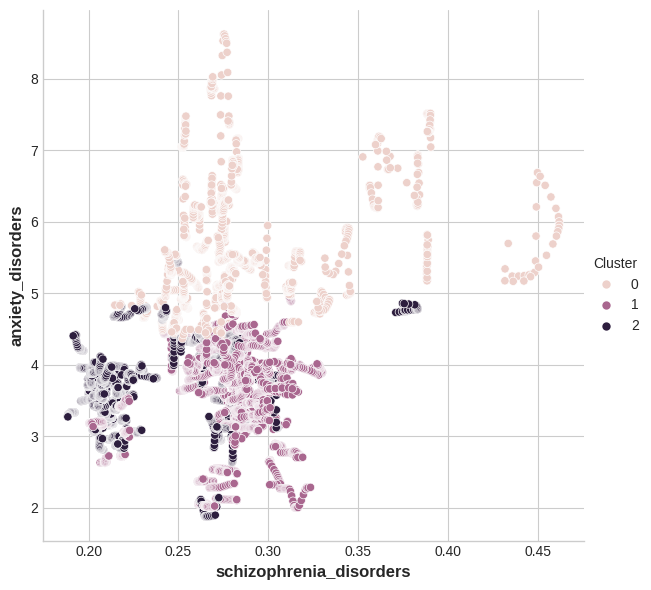

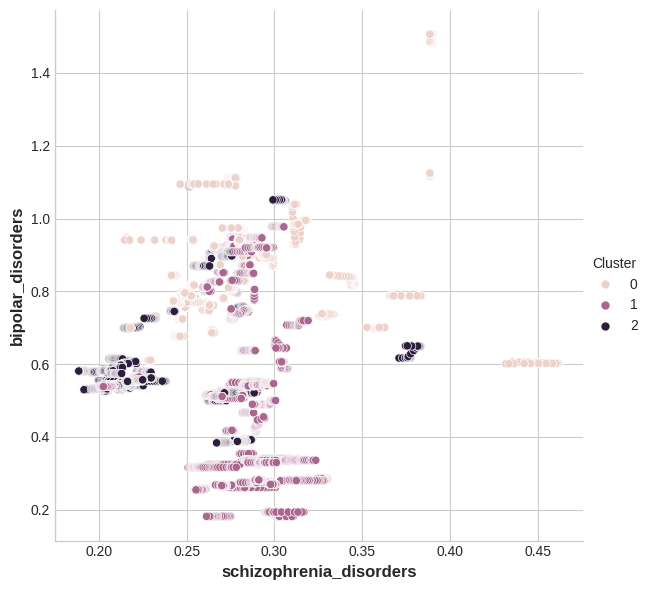

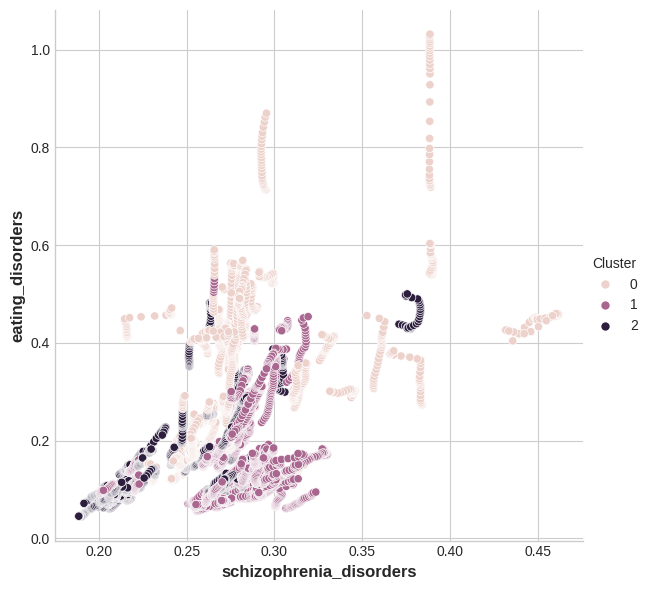

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Use dfs[0] as the base DataFrame, which contains the prevalence data.
# Ensure 'features' variable is defined and contains the column names you want to use for clustering.
# Based on the previous code, it seems these are the prevalence columns.
features = [
    'schizophrenia_disorders',
    'depression_disorders',
    'anxiety_disorders',
    'bipolar_disorders',
    'eating_disorders'
]

# Create X_model_MiniB by selecting the features and dropping rows with NaN values
# since clustering algorithms often require complete data.
X_model_MiniB = dfs[0][features].dropna().copy()

# Ensure the column names used in the sns.relplot calls match the actual column names
# in the DataFrame after potential renames. Looking at the rename logic,
# 'Schizophrenia' should be 'schizophrenia_disorders' etc.
# Let's adjust the plot calls accordingly.

# Check if X_model_MiniB is empty after dropping NaNs
if X_model_MiniB.empty:
    print("DataFrame is empty after dropping NaN values. Cannot perform clustering.")
else:
    kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=6, n_init=10) # Added n_init
    X_model_MiniB["Cluster"] = kmeans.fit_predict(X_model_MiniB)
    X_model_MiniB["Cluster"] = X_model_MiniB["Cluster"].astype("int")

    print(X_model_MiniB.head())

    plt.figure(figsize=(10,5), dpi=200)
    plt.style.use('seaborn-v0_8-whitegrid') # Use an updated seaborn style name
    plt.rc("figure", autolayout=True)
    plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)

    # Use the correct, lowercased column names for plotting
    sns.relplot(x='schizophrenia_disorders', y='depression_disorders', hue='Cluster', data=X_model_MiniB, height=6)
    sns.relplot(x='schizophrenia_disorders', y='anxiety_disorders', hue='Cluster', data=X_model_MiniB, height=6)
    sns.relplot(x='schizophrenia_disorders', y='bipolar_disorders', hue='Cluster', data=X_model_MiniB, height=6)
    sns.relplot(x='schizophrenia_disorders', y='eating_disorders', hue='Cluster', data=X_model_MiniB, height=6)

    plt.show()


